In [1]:
import gaiaxpy as gxp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sdss

from astroML.sum_of_norms import sum_of_norms, norm
from astroquery.sdss import SDSS as aq_sdss
from scipy.optimize import curve_fit

In [2]:
# data-relevant constants
DF = pd.read_csv('../data/gaia_sdss_joined.csv')
FIGURE_PATH = '../figures'

GAIA_ID_COLNAME = 'source_id'
SDSS_ID_COLNAME = 'specObjId'
NUM_NORMS = 800

In [3]:
# plot fontsize settings

SMALL_FONT_SIZE = 16
MEDIUM_FONT_SIZE = 20
LARGE_FONT_SIZE = 20

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [4]:
# line properties

PROPS = {
    'sdss_raw': { 'color': '#AAAAAA', 'ls': '--', 'lw': 1, 'label': 'SDSS flux' },
    'gaussian': { 'color': '#FF4444', 'ls': '-', 'lw': 2, 'label': 'Gaussian fit to SDSS flux' },
    'gaia': {'color': '#4444FF', 'ls': '-', 'lw': 2, 'label': 'Gaia flux' }
}

In [5]:
def plot_w_props(x, y, props):
    plt.plot(x, y, color=props['color'], ls=props['ls'], lw=props['lw'], label=props['label'])
    
def plot(*, gaia_id=None, sdss_id=None):
    if gaia_id is None and sdss_id is None:
        print('No ID supplied')
    elif sdss_id is None:    
        try:
            sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an SDSS ID corresponding to the provided Gaia ID')
    elif gaia_id is None:
        try:
            gaia_id = DF.loc[DF[SDSS_ID_COLNAME] == sdss_id][GAIA_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an Gaia ID corresponding to the provided SDSS ID')
    
    gaia_flux, gaia_sampling = gxp.calibrate([gaia_id], truncation=True)
    
    gaia_flux = gaia_flux['flux'][0]
    gaia_sampling = gaia_sampling
    
    sp = sdss.SpecObj(int(sdss_id))
    data = aq_sdss.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    
    spec_data = data[0][1].data

    sdss_sampling = 10 ** spec_data['loglam'] / 10  # Convert log wavelength to linear and Å to nm
    sdss_flux = spec_data['flux'] * 1e-19 # Convert SDSS units (1e-17 in cgs) to Gaia units (SI)

    w_best, rms, locs, widths = sum_of_norms(sdss_sampling, sdss_flux, NUM_NORMS,
                                             spacing='linear',
                                             full_output=True)

    norms = w_best * norm(sdss_sampling[:, None], locs, widths)

    # plot the results

    plt.figure(figsize=(20, 10))
    plot_w_props(sdss_sampling, sdss_flux, PROPS['sdss_raw'])
    plot_w_props(sdss_sampling, norms.sum(1), PROPS['gaussian'])
    plot_w_props(gaia_sampling, gaia_flux, PROPS['gaia'])

    plt.legend(loc=0)

    plt.text(0.97, 0.8, f"rms error = {rms:.2}",ha='right', va='top', transform=plt.gca().transAxes)
    plt.title(f"Gaia source_id {gaia_id}\n SDSS specObjId {sdss_id}")
    
    plt.xlabel('$\\lambda$ [nm]')
    plt.ylabel('flux [W m$^{-2}$ nm$^{-1}$]')
    
    plt.xlim(350, 950)
    plt.xticks(np.arange(360, 960, 20))
    
    for axis in [ 'top', 'bottom', 'left', 'right' ]:
        plt.gca().spines[axis].set_linewidth(2)
    
    if not os.path.exists(FIGURE_PATH):
        os.mkdir(FIGURE_PATH)

    plt.savefig(f'{FIGURE_PATH}/gaia_{gaia_id}_sdss_{sdss_id}.png')
    plt.show()

In [6]:
for gaia_id in DF[:20][GAIA_ID_COLNAME]:
    plot(gaia_id=gaia_id)

500 Error 500:
Code: 500, msg: Unable to create connection to database
Source: [ajp-nio-127.0.0.1-8009-exec-212] Timeout: Pool empty. Unable to fetch a connection in 60 seconds, none available[size:15; busy:1; idle:0; lastwait:60000].

Cannot process request: 'https://gea.esac.esa.int/data-server/data' (req: Reqid: anonymous1686119073728, retrieval access: DIRECT, retrieval type: XP_CONTINUOUS, compression: null), for user: UwsJobOwner{id='anonymous', name='null', mail='null', authUsername='null', authGroups=[], pseudo='anonymous', session='F9656F92CCA1005947B98D899C1EF360', ip='188.252.208.96', roles=0, parameters=Owner parameters: 6},  due to: Code: 500, msg: Unable to create connection to database
Source: [ajp-nio-127.0.0.1-8009-exec-212] Timeout: Pool empty. Unable to fetch a connection in 60 seconds, none available[size:15; busy:1; idle:0; lastwait:60000].


HTTPError: Error 500:
Code: 500, msg: Unable to create connection to database
Source: [ajp-nio-127.0.0.1-8009-exec-212] Timeout: Pool empty. Unable to fetch a connection in 60 seconds, none available[size:15; busy:1; idle:0; lastwait:60000].

Cannot process request: 'https://gea.esac.esa.int/data-server/data' (req: Reqid: anonymous1686119073728, retrieval access: DIRECT, retrieval type: XP_CONTINUOUS, compression: null), for user: UwsJobOwner{id='anonymous', name='null', mail='null', authUsername='null', authGroups=[], pseudo='anonymous', session='F9656F92CCA1005947B98D899C1EF360', ip='188.252.208.96', roles=0, parameters=Owner parameters: 6},  due to: Code: 500, msg: Unable to create connection to database
Source: [ajp-nio-127.0.0.1-8009-exec-212] Timeout: Pool empty. Unable to fetch a connection in 60 seconds, none available[size:15; busy:1; idle:0; lastwait:60000].

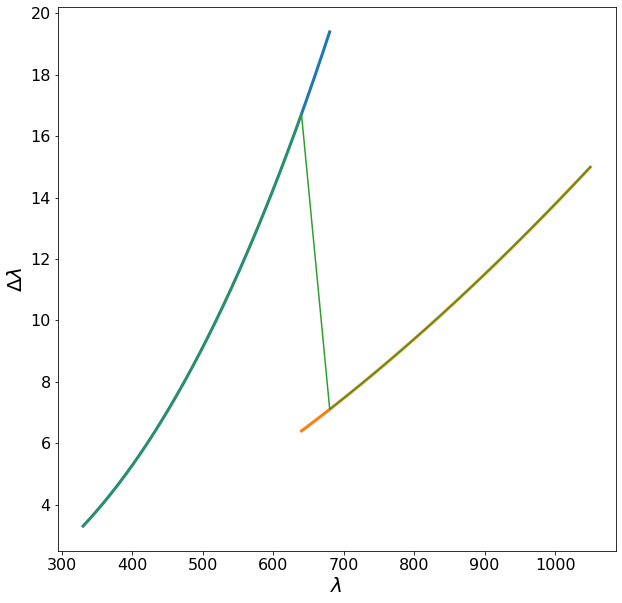

In [6]:
x1 = np.linspace(330, 680, 1000)
y1 = 3.30 * (x1/330)**2.45

x2 = np.linspace(640, 1050, 1000)
y2 = 6.40 * (x2/640)**1.72

plt.figure(figsize=(10, 10))
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, lw=3)

def deltaXP(wvl):
    y1 = lambda x: 3.30 * (x/330)**2.45
    y2 = lambda x: 6.40 * (x/640)**1.72
    y_mid = lambda x: (y2(680) * (x - 640) + y1(640) * (680 - x))/40
    
    return np.piecewise(wvl, \
                        [wvl < 640, (640 <= wvl) & (wvl <= 680), wvl > 680], \
                        [y1, y_mid, y2])
#     return np.piecewise(wvl, \
#                         [wvl < 660, wvl >= 660], \
#                         [y1, y2])
    
x = np.linspace(330, 1050, 2000)
plt.xlabel('$\\lambda$')
plt.ylabel('$\\Delta\\lambda$')
plt.plot(x, deltaXP(x))

In [14]:
def plot_conv(*, gaia_id=None, sdss_id=None, k=1):
    if gaia_id is None and sdss_id is None:
        print('No ID supplied')
    elif sdss_id is None:    
        try:
            sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an SDSS ID corresponding to the provided Gaia ID')
    elif gaia_id is None:
        try:
            gaia_id = DF.loc[DF[SDSS_ID_COLNAME] == sdss_id][GAIA_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an Gaia ID corresponding to the provided SDSS ID')
            
    # get sdss data
    try:
        sp = sdss.SpecObj(int(sdss_id))
        data = aq_sdss.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    except:
        print('Could not get SDSS data')
        return
    
    spec_data = data[0][1].data

    sdss_sampling = 10 ** spec_data['loglam'] / 10  # Convert log wavelength to linear and Å to nm
    sdss_flux = spec_data['flux'] * 1e-19 # Convert SDSS units (1e-17 in cgs) to Gaia units (SI)
    
    # const (test)
#     sdss_flux = np.array([np.mean(sdss_flux)] * len(sdss_flux))
    
    # get gaia data and calibrate using sdss sampling
    gaia_flux = gxp.calibrate([gaia_id], sampling=sdss_sampling, truncation=True)[0]['flux'][0]

    weights, fit_rms, locs, widths = sum_of_norms(sdss_sampling, sdss_flux, NUM_NORMS,
                                                 spacing='linear',
                                                 full_output=True)
    
    # convolve sdss with sigma_gaia
#     sigma_conv = np.sqrt(widths**2 + k**2 * deltaXP(locs)**2)  # convolve gaussian sigmas with sigma_gaia
    sigma_conv = np.sqrt(widths**2 + k**2 * deltaXP(sdss_sampling[:, None])**2)  # convolve gaussian sigmas with sigma_gaia
    sdss_flux_fit = (weights * norm(sdss_sampling[:, None], locs, widths)).sum(1)
    sdss_conv = (weights * norm(sdss_sampling[:, None], locs, sigma_conv)).sum(1)
    
    # integrate flux as sanity check
    mask = (sdss_sampling > 390) & (sdss_sampling < 900)
    raw_flux = np.trapz(sdss_flux[mask], sdss_sampling[mask])
    fit_flux = np.trapz(sdss_flux_fit[mask], sdss_sampling[mask])
    conv_flux = np.trapz(sdss_conv[mask], sdss_sampling[mask])
    
    # compute rms error and quotient between sdss convolution and gaia data
    match_rms = np.sqrt(np.mean((sdss_conv[mask] - gaia_flux[mask])**2))
    quot = np.median(sdss_conv/gaia_flux)

    # plot the results

    plt.figure(figsize=(20, 10))
    plot_w_props(sdss_sampling, sdss_flux, PROPS['sdss_raw'])
    plot_w_props(sdss_sampling, sdss_conv, PROPS['gaussian'])
    plot_w_props(sdss_sampling, gaia_flux, PROPS['gaia'])

    plt.legend(loc=0)

    plt.text(0.97, 0.8, f"gaussian fit rms error = {fit_rms:.2}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.75, f"k = {k:.2}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.7, f"sdss - gaia rms error = {match_rms:.3}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.65, f"sdss/gaia quotient = {quot:.3}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.6, f"integrated flux (raw) = {raw_flux:.5}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.55, f"integrated flux (fit) = {fit_flux:.5}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.97, 0.5, f"integrated flux (conv) = {conv_flux:.5}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.title(f"Gaia source_id {gaia_id}\n SDSS specObjId {sdss_id}")
    
    plt.xlabel('$\\lambda$ [nm]')
    plt.ylabel('flux [W m$^{-2}$ nm$^{-1}$]')
    
    plt.xlim(350, 950)
    plt.xticks(np.arange(360, 960, 20))
    
    for axis in [ 'top', 'bottom', 'left', 'right' ]:
        plt.gca().spines[axis].set_linewidth(2)
    
    if not os.path.exists(FIGURE_PATH):
        os.mkdir(FIGURE_PATH)

    plt.savefig(f'{FIGURE_PATH}/gaia_{gaia_id}_sdss_{sdss_id}_k_{int(k*10)}.png')
    plt.show()

In [8]:
def plot_conv_get_gaia(*, gaia_id=None, sdss_id=None):
    if gaia_id is None and sdss_id is None:
        print('No ID supplied')
    elif sdss_id is None:    
        try:
            sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an SDSS ID corresponding to the provided Gaia ID')
    elif gaia_id is None:
        try:
            gaia_id = DF.loc[DF[SDSS_ID_COLNAME] == sdss_id][GAIA_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an Gaia ID corresponding to the provided SDSS ID')
            
    # get sdss data
    try:
        sp = sdss.SpecObj(int(sdss_id))
        data = aq_sdss.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    except:
        print('Could not get SDSS data')
        return
    
    spec_data = data[0][1].data

    sdss_sampling = 10 ** spec_data['loglam'] / 10  # Convert log wavelength to linear and Å to nm
    sdss_flux = spec_data['flux'] * 1e-19 # Convert SDSS units (1e-17 in cgs) to Gaia units (SI)
    
    # get gaia data and calibrate using sdss sampling
    while True:
        try:
            print('calibrating gaia...')
            gaia_flux = gxp.calibrate([gaia_id], sampling=sdss_sampling, truncation=True)[0]['flux'][0]
            print('done.')
            return gaia_flux
        except Exception as e:
            print(e)
            continue

In [13]:
def plot_conv_k_rms(gaia_flux, *, gaia_id=None, sdss_id=None, k=1):
    if gaia_id is None and sdss_id is None:
        print('No ID supplied')
    elif sdss_id is None:    
        try:
            sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an SDSS ID corresponding to the provided Gaia ID')
    elif gaia_id is None:
        try:
            gaia_id = DF.loc[DF[SDSS_ID_COLNAME] == sdss_id][GAIA_ID_COLNAME].to_list()[0]
        except:
            print('Could not find an Gaia ID corresponding to the provided SDSS ID')
            
    # get sdss data
    try:
        sp = sdss.SpecObj(int(sdss_id))
        data = aq_sdss.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    except:
        print('Could not get SDSS data')
        return
    
    spec_data = data[0][1].data

    sdss_sampling = 10 ** spec_data['loglam'] / 10  # Convert log wavelength to linear and Å to nm
    sdss_flux = spec_data['flux'] * 1e-19 # Convert SDSS units (1e-17 in cgs) to Gaia units (SI)
    
    weights, fit_rms, locs, widths = sum_of_norms(sdss_sampling, sdss_flux, NUM_NORMS,
                                                 spacing='linear',
                                                 full_output=True)
    
    # convolve sdss with sigma_gaia
    sigma_conv = np.sqrt(widths**2 + k**2 * deltaXP(sdss_sampling[:, None])**2)  # convolve gaussian sigmas with sigma_gaia
    sdss_flux_fit = (weights * norm(sdss_sampling[:, None], locs, widths)).sum(1)
    sdss_conv = (weights * norm(sdss_sampling[:, None], locs, sigma_conv)).sum(1)
    
    # integrate flux as sanity check
    mask = (sdss_sampling > 390) & (sdss_sampling < 900)
    raw_flux = np.trapz(sdss_flux[mask], sdss_sampling[mask])
    fit_flux = np.trapz(sdss_flux_fit[mask], sdss_sampling[mask])
    conv_flux = np.trapz(sdss_conv[mask], sdss_sampling[mask])
    
    # compute rms error and quotient between sdss convolution and gaia data
    match_rms = np.sqrt(np.mean((sdss_conv[mask] - gaia_flux[mask])**2))
    quot = np.median(sdss_conv[mask]/gaia_flux[mask])

    return match_rms

In [12]:
out = {}
for gaia_id in DF[:1000][GAIA_ID_COLNAME]:
    min_k, min_rmse = 100, 100
    gaia_flux = plot_conv_get_gaia(gaia_id=gaia_id)
    if gaia_flux is None:
        continue
            
    for k in np.arange(0.20, 1.800001, 0.02):
        rmse = plot_conv_k_rms(gaia_flux, gaia_id=gaia_id, k=k)
        if rmse < min_rmse:
            min_rmse = rmse
            min_k = k
        else:
            break
        
    out[gaia_id] = k
    print(f'{gaia_id}\t{k}')

calibrating gaia...


3217536339907648384	0.5999999999999999
calibrating gaia...


3697743267334291328	1.7999999999999992
calibrating gaia...


3683666666640754048	0.6999999999999997
calibrating gaia...


3683528776714709632	0.6399999999999998
calibrating gaia...


3683494176458551808	0.5599999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3658537736409397888	1.5399999999999994
calibrating gaia...


3694803688638177280	0.33999999999999997
calibrating gaia...


3649721512875483904	0.41999999999999993
calibrating gaia...


3652755958809710464	0.5599999999999998
calibrating gaia...


3695425290664568704	0.47999999999999987
calibrating gaia...


3649003463063106304	1.7999999999999992
calibrating gaia...


3217961747828046080	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3683515410776636800	1.7999999999999992
calibrating gaia...


3217574234403744000	0.47999999999999987
calibrating gaia...


3637758792005488896	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073311956582747392	0.5999999999999999
calibrating gaia...


3694818222807582080	0.5599999999999998
calibrating gaia...


3793876214650688640	0.31999999999999995
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3661566306828100224	0.47999999999999987
calibrating gaia...


3659347256140256256	0.9799999999999995
calibrating gaia...


3685958598628554240	0.22
calibrating gaia...


3602512675468007808	0.41999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083085790322125056	1.2399999999999995
calibrating gaia...


3695495659409680896	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838954920078817920	0.4399999999999999
calibrating gaia...


3697644723605458688	0.5199999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685855759931545344	0.5399999999999998
calibrating gaia...


3699127415035217408	0.33999999999999997
calibrating gaia...


3683680170017942656	0.4599999999999999
calibrating gaia...


3652781793037773824	0.35999999999999993
calibrating gaia...


3685813772331365376	0.6199999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838181959109379200	0.6199999999999999
calibrating gaia...


3697674513498510848	0.41999999999999993
calibrating gaia...


3218157151659623808	0.5399999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073340780107949696	0.33999999999999997
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838180687799025536	1.7999999999999992
calibrating gaia...


3834177232818514176	0.35999999999999993
calibrating gaia...


3089590634254203264	0.35999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3078366132362102016	1.7999999999999992
calibrating gaia...


3683600043107730048	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839626275006859008	0.4599999999999999
calibrating gaia...


3683665975150552704	0.7199999999999998
calibrating gaia...


3220264503133565056	0.4599999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839691244977478528	0.5399999999999998
calibrating gaia...


3683699274032512256	0.47999999999999987
calibrating gaia...


3683599287193483264	0.5999999999999999
calibrating gaia...


3694638379640556800	0.8999999999999997
calibrating gaia...


3661796005974254080	0.6199999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083030260687661696	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083035212787465216	1.7999999999999992
calibrating gaia...


3026236980420116736	0.5599999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074834264791142656	0.3799999999999999
calibrating gaia...


4409412751215757824	0.8199999999999996
calibrating gaia...


3650283908777806592	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3832936914982882816	0.41999999999999993
calibrating gaia...


3830123642684368640	1.0799999999999996
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3796764146364818944	0.3799999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119315145135658624	0.5599999999999998
calibrating gaia...


3638788652148365312	0.5199999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838116709965999232	0.7799999999999998
calibrating gaia...


3832997830503960448	0.5399999999999998
calibrating gaia...


3650568308627752704	1.7999999999999992
calibrating gaia...


3602512709827746432	0.5199999999999998
calibrating gaia...


4359367581824642304	0.6999999999999997
calibrating gaia...


3650615686411758080	0.22
calibrating gaia...


4418207465548553600	1.7999999999999992
calibrating gaia...


3218956767195945856	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3652579689056579200	0.4399999999999999
calibrating gaia...


3695633716838262784	0.4399999999999999
calibrating gaia...


3683700682781785984	0.5399999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3805938269523770752	0.4599999999999999
calibrating gaia...


3686466843582747776	0.5599999999999998
calibrating gaia...


3220655997992856448	0.4599999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3082338775250660480	1.7999999999999992
Could not get SDSS data
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3697863762641373952	0.27999999999999997
calibrating gaia...


3803104651965398144	0.6599999999999997
calibrating gaia...


3658947343145360000	0.49999999999999983
calibrating gaia...


3652785611263875328	0.49999999999999983
calibrating gaia...


3697878507264727040	0.4399999999999999
calibrating gaia...


3602766422135500544	0.6999999999999997
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685843699663458176	0.6199999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3647757785108193792	0.4399999999999999
calibrating gaia...


3217699514305723392	0.5199999999999998
calibrating gaia...


3829993380621350656	0.5799999999999998
calibrating gaia...


3796875441853068032	1.5399999999999994
calibrating gaia...


3071324073920137600	0.5399999999999998
calibrating gaia...


3697860949438190336	0.5199999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686611395002565504	0.3799999999999999
calibrating gaia...


3658844641887514752	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073397989071571456	0.4599999999999999
calibrating gaia...


3687347694131168000	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838946123985841664	0.47999999999999987
calibrating gaia...


3694071139016495232	1.7999999999999992
calibrating gaia...


3662588891297034240	0.5399999999999998
calibrating gaia...


3650596449253407104	0.6399999999999998
calibrating gaia...


3791928837823523200	1.4199999999999993
calibrating gaia...


3071219448517914368	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083878366407415680	0.24
calibrating gaia...


3698619131425316352	0.5799999999999998
calibrating gaia...


3796760611607385728	0.47999999999999987
calibrating gaia...


3793828901290912000	0.5599999999999998
calibrating gaia...


3226707709992430080	0.6199999999999999
calibrating gaia...


3026255745133184640	0.5199999999999998
calibrating gaia...


3695572453424818176	0.49999999999999983
calibrating gaia...


4359367169507771264	0.6999999999999997
calibrating gaia...


4409231847192105088	0.6999999999999997
calibrating gaia...


3647720848389424128	0.49999999999999983
calibrating gaia...


3697668912861183872	0.6599999999999997
calibrating gaia...


3658775647532847744	0.7999999999999996
calibrating gaia...


3694898963896826624	1.4599999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083104482019670656	0.5199999999999998
calibrating gaia...


3217700888695259264	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107325108275779712	0.22
calibrating gaia...


3803142378958248960	0.5799999999999998
calibrating gaia...


3695535001310137728	0.49999999999999983
calibrating gaia...


3796900932483433728	1.5799999999999992
calibrating gaia...


3695463773571585024	0.49999999999999983
calibrating gaia...


3118674267295282176	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3662018519639899520	0.3999999999999999
calibrating gaia...


3694880517013152256	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3657976813680672512	0.22
calibrating gaia...


3796849019214227840	0.4599999999999999
calibrating gaia...


3650506907775264128	0.6399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119344213474187776	0.4599999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083087989345156096	0.6199999999999999
calibrating gaia...


3637754840635519104	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083157426079306624	0.5799999999999998
calibrating gaia...


3695037094341169536	0.49999999999999983
calibrating gaia...


3661526415172080256	1.3799999999999994
calibrating gaia...


3697665957923744896	0.4399999999999999
calibrating gaia...


3694045880312662400	0.27999999999999997
calibrating gaia...


3697845792498132224	0.4399999999999999
calibrating gaia...


3661782876258573184	0.3999999999999999
calibrating gaia...


3650534361206238080	0.49999999999999983
calibrating gaia...


3218211195232612096	0.6599999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3082342279943984768	1.7999999999999992
calibrating gaia...


3686066488206991104	0.47999999999999987
calibrating gaia...


3650271509207632640	0.3799999999999999
calibrating gaia...


3071124306400537344	0.49999999999999983
calibrating gaia...


3650394654509986304	0.47999999999999987
calibrating gaia...


3071169210282825984	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3688791039365636992	0.5999999999999999
calibrating gaia...


6340922353824671232	0.5199999999999998
calibrating gaia...


3683497994684983808	0.31999999999999995
calibrating gaia...


4416172033303470464	0.35999999999999993
calibrating gaia...


4415415805526237824	0.7199999999999998
calibrating gaia...


3650749762405882752	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073546938538407680	0.41999999999999993
calibrating gaia...


3220333050811417472	0.49999999999999983
calibrating gaia...


3695661891823773184	0.4599999999999999
calibrating gaia...


3220676987497921536	0.5599999999999998
calibrating gaia...


3687330239384068352	0.4399999999999999
calibrating gaia...


3217448855717025024	1.4199999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838938320029639808	0.5199999999999998
calibrating gaia...


3796653031266675328	0.47999999999999987
calibrating gaia...


3695084442060513792	0.4399999999999999
calibrating gaia...


3794117660532024704	0.4599999999999999
calibrating gaia...


3647764794494836864	0.47999999999999987
calibrating gaia...


3686406507882734208	0.6999999999999997
calibrating gaia...


6340959599781125376	1.1399999999999995
calibrating gaia...


3661542873486819584	1.7999999999999992
calibrating gaia...


3683497131395716608	0.6599999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083078780935428096	1.1399999999999995
calibrating gaia...


3694839800723255168	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685833426101670400	0.3799999999999999
calibrating gaia...


3695561527027969536	0.5399999999999998
calibrating gaia...


3796670967050329728	0.7599999999999998
calibrating gaia...


3649842248700471936	0.5599999999999998
calibrating gaia...


3650802848201638528	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3830889207719998080	0.3999999999999999
calibrating gaia...


3686398433344160512	0.6399999999999998
calibrating gaia...


3121404045426899712	0.6599999999999997
calibrating gaia...


3686333669532459008	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3082358566459685504	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


4419194345954599808	1.1799999999999995
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3695633579399309696	0.31999999999999995
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073636415591097088	0.41999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073572437759012480	0.3999999999999999
calibrating gaia...


3791700105044983296	0.6599999999999997
calibrating gaia...


3695620385259865856	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686760550626623616	0.47999999999999987
calibrating gaia...


3650418637607371136	0.47999999999999987
calibrating gaia...


3218216830229745152	0.5599999999999998
calibrating gaia...


4406962283393008768	0.5599999999999998
calibrating gaia...


3793706305744167296	0.47999999999999987
calibrating gaia...


3830770636557923712	1.1199999999999994


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685866102212768896	0.47999999999999987
calibrating gaia...


3217677902030274432	0.31999999999999995
calibrating gaia...


3833021199421007232	0.7399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3659410301965374464	0.7199999999999998
calibrating gaia...


3638529584016341888	1.7999999999999992
calibrating gaia...


4404215802128189824	1.7999999999999992
calibrating gaia...


3661816583162477952	1.7999999999999992
calibrating gaia...


3794053682699215872	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685835586469878144	0.22
calibrating gaia...


3220333806724676480	1.7999999999999992
calibrating gaia...


3794077043025798144	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685883866197604736	0.31999999999999995
calibrating gaia...


4415606261555475584	1.3799999999999994
calibrating gaia...


3695839119353538304	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840471520275723008	0.4599999999999999
calibrating gaia...


3071299437988562944	0.47999999999999987
calibrating gaia...


3697717669329990656	0.6399999999999998
calibrating gaia...


3602575721291710720	0.3999999999999999
calibrating gaia...


3652831580298304640	0.5799999999999998
calibrating gaia...


3794112953247833216	0.41999999999999993
calibrating gaia...


3833164372155832576	0.6199999999999999
calibrating gaia...


3121421568894419456	0.6199999999999999
calibrating gaia...


3686790928930693632	0.47999999999999987
calibrating gaia...


3686336727549178112	0.47999999999999987
calibrating gaia...


3071345273878748288	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3638786388700921472	0.5599999999999998
calibrating gaia...


3694874366619968768	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073637785686378112	0.9799999999999995
calibrating gaia...


3220651874824138880	0.47999999999999987
calibrating gaia...


3695086641083731072	1.7999999999999992
calibrating gaia...


3695424874052189312	0.5599999999999998
calibrating gaia...


3217703770616216064	0.47999999999999987
calibrating gaia...


3638489894223118720	0.7199999999999998
calibrating gaia...


3694912299771150976	0.41999999999999993
calibrating gaia...


3683519503881169408	0.49999999999999983
calibrating gaia...


3653053651582820992	0.5199999999999998
calibrating gaia...


3683565545930484096	0.4599999999999999
calibrating gaia...


6339940970977504128	0.4599999999999999
calibrating gaia...


3650426742210702976	1.0199999999999996
calibrating gaia...


3688685524904418688	0.5199999999999998
calibrating gaia...


3697897886157114240	0.3999999999999999
calibrating gaia...


3217670514686901888	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3659553242771650432	0.41999999999999993
calibrating gaia...


3658821036747324800	0.5399999999999998
calibrating gaia...


3638457669084084224	0.49999999999999983
calibrating gaia...


3686418091409592832	0.3799999999999999
calibrating gaia...


3071286690525620736	0.47999999999999987
calibrating gaia...


3695078188588164352	0.35999999999999993
calibrating gaia...


3662625896735209216	0.49999999999999983
calibrating gaia...


3220666752590825984	1.7999999999999992
calibrating gaia...


3796960516565302784	0.6399999999999998
calibrating gaia...


3698048965927359488	0.31999999999999995
calibrating gaia...


4404150522924928000	1.2799999999999994
calibrating gaia...


3071139660908721920	0.31999999999999995
calibrating gaia...


3698112016047184256	0.24


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073336386356643200	0.5199999999999998
calibrating gaia...


3659498232830774912	0.6399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074888789400038912	1.7999999999999992
calibrating gaia...


3797134750503137920	0.5599999999999998
calibrating gaia...


3689576610359318144	1.7999999999999992
calibrating gaia...


3686459735412518144	0.41999999999999993
calibrating gaia...


3797169595572945536	0.9999999999999996


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073311162013249280	0.4599999999999999
calibrating gaia...


3697920426145562240	0.4599999999999999
calibrating gaia...


3659587701293876352	0.7999999999999996
calibrating gaia...


3650663450743252864	0.4599999999999999
calibrating gaia...


4406556804121043200	0.33999999999999997
calibrating gaia...


3697635824433213440	0.47999999999999987
calibrating gaia...


3696410899760083712	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083893965728653440	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107325005196586112	0.41999999999999993
calibrating gaia...


4404278714812145024	1.7999999999999992
calibrating gaia...


3805815227300905344	0.7199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840529588233034496	0.5399999999999998
calibrating gaia...


3217633577967729664	0.33999999999999997
calibrating gaia...


3077106714807848448	0.5199999999999998
calibrating gaia...


3662008035624531456	0.47999999999999987
calibrating gaia...


3602564799191078272	0.4599999999999999
calibrating gaia...


3698031236302386432	0.3999999999999999
calibrating gaia...


3652808250036399360	0.6199999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686620229750494336	0.27999999999999997
calibrating gaia...


3695442607972692096	0.49999999999999983
calibrating gaia...


3658947892901176320	0.6599999999999997
calibrating gaia...


3683675183560485760	0.7799999999999998
calibrating gaia...


3683535923540321792	0.35999999999999993
Could not get SDSS data
calibrating gaia...


3695661754384818432	0.6399999999999998
calibrating gaia...


3220651393787995648	0.5199999999999998
calibrating gaia...


3686378951372307200	0.5399999999999998
calibrating gaia...


4404373960003929984	1.1399999999999995
Could not get SDSS data
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687402497913872640	1.0799999999999996
calibrating gaia...


3602768689878233728	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840480011426102400	0.4599999999999999
calibrating gaia...


3686469180045558144	0.33999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3782955448550910464	0.8599999999999997
calibrating gaia...


3803126612133187584	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3218222155989192576	0.22
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074850100334553856	1.7999999999999992
calibrating gaia...


3217685323733755904	0.6199999999999999
calibrating gaia...


3220534257144314752	0.35999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840476674236540288	0.49999999999999983
calibrating gaia...


3832752952943602816	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3218328293220715264	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687371780307844736	0.22
calibrating gaia...


3651303503949657088	0.41999999999999993
calibrating gaia...


4359165001103633792	1.7999999999999992
calibrating gaia...


3695103477355606656	0.3999999999999999
calibrating gaia...


3683360173479011712	0.3799999999999999
calibrating gaia...


3220542469121877888	0.5399999999999998
calibrating gaia...


3686469012541871104	0.22


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083887364360612736	0.5399999999999998
calibrating gaia...


3794214073957976064	0.5199999999999998
calibrating gaia...


3661690860879324032	0.7599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3218267686938289408	0.22
calibrating gaia...


3685605444942257280	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119307585993288704	0.26
calibrating gaia...


3695433537001757824	0.5199999999999998
calibrating gaia...


4404188730953874560	0.7999999999999996
calibrating gaia...


3217763457778740480	0.4599999999999999
calibrating gaia...


3220654211286290944	0.5399999999999998
calibrating gaia...


3695395569490973824	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686598956777262336	0.41999999999999993
calibrating gaia...


6340968189715790080	0.6399999999999998
calibrating gaia...


3686069198330537216	0.41999999999999993
calibrating gaia...


3649820395907751168	0.22
calibrating gaia...


3696354309270984576	0.5399999999999998
calibrating gaia...


3695104267629590400	0.4399999999999999
calibrating gaia...


3683712326437209984	0.7199999999999998
calibrating gaia...


3650599846572239872	0.3799999999999999
calibrating gaia...


3217650826556478464	0.49999999999999983
calibrating gaia...


3659598219669223936	0.41999999999999993
calibrating gaia...


3683484869264867200	0.5599999999999998
calibrating gaia...


3659324922310356480	0.3799999999999999
calibrating gaia...


3650032601651499904	0.8999999999999997
calibrating gaia...


3793987334044529024	0.47999999999999987
calibrating gaia...


6340815181505322624	1.7999999999999992
calibrating gaia...


4416907056826497280	0.3999999999999999
calibrating gaia...


3650547654129188736	0.47999999999999987
calibrating gaia...


3650405679690234368	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073477123844735616	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110009497196165376	0.4399999999999999
calibrating gaia...


3832844040609923456	0.6599999999999997
calibrating gaia...


3695680824039583360	0.4599999999999999
Could not get SDSS data
calibrating gaia...


3694895772737064832	0.49999999999999983
calibrating gaia...


3832844074969661568	1.0399999999999996
calibrating gaia...


3797174882677180544	0.4599999999999999
calibrating gaia...


6340748008217013248	0.6399999999999998
calibrating gaia...


3695466453631180032	0.5399999999999998
Could not get SDSS data
calibrating gaia...


3689645256821317888	0.5199999999999998
calibrating gaia...


3683759124400598912	0.9399999999999997
calibrating gaia...


3694965523006178816	0.4599999999999999
calibrating gaia...


3803237216131057792	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838186498889866496	0.49999999999999983
calibrating gaia...


3695778916795991296	0.6999999999999997
calibrating gaia...


3071351699149736704	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107335106959817344	0.7799999999999998
calibrating gaia...


3686468149252815744	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687364457387931648	0.8599999999999997
calibrating gaia...


3796849878207689088	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107322874892919680	0.22
calibrating gaia...


3794073400893507200	0.5199999999999998
calibrating gaia...


3683700579702588160	0.3799999999999999
calibrating gaia...


3650633660850160768	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839740005740717824	0.5599999999999998
calibrating gaia...


3650588851455696768	0.6199999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083882386496776704	1.4999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686097819992699776	0.5199999999999998
calibrating gaia...


3797147463606404608	0.47999999999999987
calibrating gaia...


3833066519915872640	0.41999999999999993
calibrating gaia...


3830169955316412416	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3081583204603528448	1.7999999999999992
calibrating gaia...


3686401766238800896	0.5199999999999998
calibrating gaia...


3697860056084990464	0.3999999999999999
calibrating gaia...


3121333981624149888	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840525499424146944	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


4418502619997175168	0.24
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840499905714564864	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073323840756827776	0.22
calibrating gaia...


3602824043416667648	0.6399999999999998
calibrating gaia...


3695696973116509568	0.4399999999999999
calibrating gaia...


3652615427479787520	1.7999999999999992
calibrating gaia...


3696359050914927360	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839025731204961024	0.5199999999999998
calibrating gaia...


3685053666199144320	0.5199999999999998
calibrating gaia...


3797125615107946368	0.9999999999999996
calibrating gaia...


3695090180136824320	0.5799999999999998
calibrating gaia...


3071157154310391168	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083917673947907584	1.7999999999999992
calibrating gaia...


3071357432929376640	0.5199999999999998
calibrating gaia...


3796999274350204288	0.49999999999999983
calibrating gaia...


3698672732617073792	0.4599999999999999
calibrating gaia...


3220678915938114048	0.6399999999999998
calibrating gaia...


3683505897424769408	0.3999999999999999
calibrating gaia...


4416079773109897216	0.41999999999999993
calibrating gaia...


3602821844393450240	0.5999999999999999
calibrating gaia...


4415625777887603840	0.41999999999999993
calibrating gaia...


4383162117260295936	0.5599999999999998
calibrating gaia...


3685559918289189504	0.31999999999999995


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073419773145786496	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110331069986591616	0.6599999999999997
calibrating gaia...


3071239102288243200	0.49999999999999983
calibrating gaia...


3832997972237880064	0.3799999999999999
calibrating gaia...


3695378866362515200	0.3799999999999999
calibrating gaia...


3695798746660959488	0.5399999999999998
calibrating gaia...


3782736542657676160	0.49999999999999983
calibrating gaia...


3832835175797426688	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


4418382665854739584	0.4599999999999999
calibrating gaia...


3695643131406586624	0.4599999999999999
calibrating gaia...


3694861447358383104	0.4399999999999999
calibrating gaia...


3602632724097449856	0.5799999999999998
calibrating gaia...


3650813465360878208	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3796601418644353536	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840463724910095872	0.41999999999999993
calibrating gaia...


3695477861064286592	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073615181274316672	0.41999999999999993
calibrating gaia...


3601736965718118272	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083880496711195776	0.8399999999999996
calibrating gaia...


3650779311780915712	0.5199999999999998
calibrating gaia...


3696343176715795456	0.5799999999999998
calibrating gaia...


3683737958801889792	0.4599999999999999
calibrating gaia...


3686771756196717056	0.47999999999999987
calibrating gaia...


6340961931947961728	1.1399999999999995
calibrating gaia...


3685908295971527040	0.5199999999999998
calibrating gaia...


4415667907222095488	0.6199999999999999
calibrating gaia...


3695371723832483200	0.47999999999999987
calibrating gaia...


3077168351883298048	0.47999999999999987
calibrating gaia...


3697710659943357056	0.4399999999999999
calibrating gaia...


3217772833690616448	0.5199999999999998
calibrating gaia...


3695303966428580864	1.7999999999999992
calibrating gaia...


3071322252854056192	0.5599999999999998
Could not get SDSS data
calibrating gaia...


3071319675873680128	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3659013687505097344	0.31999999999999995
calibrating gaia...


3827758623237442560	1.7999999999999992
calibrating gaia...


3661739174966360448	1.4999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3695557880599159424	1.7999999999999992
calibrating gaia...


3695771602467678080	0.6799999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839714510814923520	0.22
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839222891678517632	0.7399999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3827817996865666560	0.5799999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074851268566245632	0.5399999999999998
calibrating gaia...


3688863126096284928	0.5599999999999998
calibrating gaia...


3695772869482435712	0.5799999999999998
calibrating gaia...


3071168493024023168	0.41999999999999993
calibrating gaia...


3650425269036875904	0.3799999999999999
calibrating gaia...


3806105017334133376	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083098052450542976	1.7999999999999992
calibrating gaia...


3650510476893001344	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840502203522211584	0.3799999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3689654911907850880	0.35999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119311709161908480	0.22
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3689598424497882624	0.3999999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3650062494623367168	0.35999999999999993
calibrating gaia...


3796969720679730048	0.3799999999999999
calibrating gaia...


3806671094023848576	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687324295149381888	0.29999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107382145441130752	0.22
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3649582248560742656	0.4399999999999999
calibrating gaia...


3652657105842366592	0.5999999999999999
calibrating gaia...


3652786946998059520	0.5399999999999998
calibrating gaia...


4415981916575038080	0.8999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3653554096877139200	0.4399999999999999
calibrating gaia...


4414621339655336320	0.27999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3653586296246976128	0.22
calibrating gaia...


3647588048000644480	1.4199999999999993
calibrating gaia...


3796993295755711360	0.4399999999999999
calibrating gaia...


4406459119386466176	0.24


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3694777197279912704	0.3999999999999999
calibrating gaia...


3833203787070793728	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3791980072487884672	0.6399999999999998
calibrating gaia...


3803143104807606016	0.5599999999999998
calibrating gaia...


3683820765771292160	0.7199999999999998
calibrating gaia...


3659420992138802176	1.7999999999999992
calibrating gaia...


3695709858018452736	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839626962201614208	1.0199999999999996
calibrating gaia...


4404379118261464576	0.5999999999999999
calibrating gaia...


3698040822669320064	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110013409904120576	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686070267778211456	0.26
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073586795834601728	0.49999999999999983
calibrating gaia...


3683627840135415808	0.5199999999999998
calibrating gaia...


3220714546986694656	0.5399999999999998
calibrating gaia...


3833160493800483456	0.5399999999999998
calibrating gaia...


3697914786852477952	0.6999999999999997
calibrating gaia...


3217681093188852480	0.5399999999999998
calibrating gaia...


3121586117681390336	0.7799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838939252037697536	0.49999999999999983
calibrating gaia...


3218300053811746816	0.5399999999999998
calibrating gaia...


3683536649390473472	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073323535815310080	0.6399999999999998
calibrating gaia...


3791870190045656320	0.22
calibrating gaia...


3695460681195131648	0.3799999999999999
calibrating gaia...


3695644368357112448	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083863385561346432	1.7999999999999992
calibrating gaia...


3121384219858171008	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


6340784257740505472	0.29999999999999993
calibrating gaia...


3695115709422466304	0.5199999999999998
calibrating gaia...


3217622789009986944	0.49999999999999983
calibrating gaia...


3651337378355933184	0.6599999999999997
calibrating gaia...


3647543341685944192	0.5999999999999999
calibrating gaia...


3661548542843310336	0.6799999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110330928248256128	0.3799999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3697887372077236224	0.29999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083176362592994176	0.5999999999999999
calibrating gaia...


3217702022566593280	0.5599999999999998
calibrating gaia...


3217708963233735040	0.6799999999999997
Could not get SDSS data
calibrating gaia...


3695089527301792896	0.4599999999999999
calibrating gaia...


4406574087069487232	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110324915293755648	0.22
calibrating gaia...


3650483852390820736	0.8999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107338336775098496	0.6799999999999997
calibrating gaia...


3793715548513800064	0.3799999999999999
calibrating gaia...


3697889742899186176	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3683782802557251456	0.5599999999999998
calibrating gaia...


3694859832450648576	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073582127205191424	0.3999999999999999
calibrating gaia...


3698088617065361920	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107341424852452864	0.24
calibrating gaia...


3697824558179807488	0.7199999999999998
calibrating gaia...


6340971110293554944	0.3999999999999999
calibrating gaia...


3833029205240042368	0.4399999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110199678346704640	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839550683582218880	0.27999999999999997
calibrating gaia...


3220300026807690112	0.31999999999999995
calibrating gaia...


3650671417907498752	0.31999999999999995
calibrating gaia...


3805809351785629824	0.41999999999999993
calibrating gaia...


3220349165528713216	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074843576280156928	1.7999999999999992
calibrating gaia...


3694006439629179392	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083160179156076672	0.6599999999999997
calibrating gaia...


3686374214023732352	0.3999999999999999
calibrating gaia...


4359245712130514048	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839741616357319936	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110193111335446784	0.29999999999999993
calibrating gaia...


4359351746282303232	0.6399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3689022628297503232	0.7799999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074357798298718464	0.4599999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074863088316386176	0.5999999999999999
calibrating gaia...


3695111139577268096	0.5199999999999998
calibrating gaia...


3697959836765409408	0.5799999999999998
calibrating gaia...


3688822654620352128	0.49999999999999983
calibrating gaia...


3832976905423004800	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3658832439885180416	0.6399999999999998
calibrating gaia...


3071309436672361600	0.5599999999999998
calibrating gaia...


3697660735243545728	0.5199999999999998
calibrating gaia...


3220640398671592448	0.41999999999999993
calibrating gaia...


3697885894608423552	0.3999999999999999
calibrating gaia...


3686461586542762368	1.7999999999999992
calibrating gaia...


3602612593586661760	0.47999999999999987
calibrating gaia...


3226711420844168832	1.7999999999999992
calibrating gaia...


3793139709363497728	1.7999999999999992
calibrating gaia...


3688743352344308608	1.7999999999999992
calibrating gaia...


3653576705585074304	0.35999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3647587871907182592	0.26
calibrating gaia...


3650643384656034304	0.41999999999999993
calibrating gaia...


3694868319306032000	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838955637338556800	0.5199999999999998
calibrating gaia...


4416214841242090240	0.49999999999999983
Could not get SDSS data
calibrating gaia...


3697872906627178496	0.3799999999999999
calibrating gaia...


3602584727839301888	0.4599999999999999
calibrating gaia...


4407027906195391360	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838895610875095168	0.6199999999999999
calibrating gaia...


4415597023080841472	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3842065090580902144	1.2399999999999995
calibrating gaia...


3686528867206304768	0.4399999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083091386661691648	0.7999999999999996
calibrating gaia...


3220709736623330688	0.7199999999999998
calibrating gaia...


3795411510839975680	0.35999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3217425869052312704	0.26
calibrating gaia...


3658759940837042560	0.8199999999999996
calibrating gaia...


3637754905059640832	1.7999999999999992
calibrating gaia...


3650585797734607232	0.27999999999999997
calibrating gaia...


3686799278347155584	0.6199999999999999
calibrating gaia...


4404354963365319552	0.6199999999999999
calibrating gaia...


3695660689232850816	0.5999999999999999
calibrating gaia...


3071406915249032064	0.5599999999999998
calibrating gaia...


3830163255167397760	1.7999999999999992
calibrating gaia...


3695554655080432896	0.6399999999999998
calibrating gaia...


3650436912692498560	1.3199999999999994


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686579680963508992	0.31999999999999995
calibrating gaia...


3218164156750780032	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840526603231287680	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839231687771556480	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073424587805242496	0.47999999999999987
calibrating gaia...


3686448465418276864	0.5199999999999998
calibrating gaia...


4359348379027860352	0.8799999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839694715311057536	0.3799999999999999
calibrating gaia...


3695072484871591936	0.49999999999999983
calibrating gaia...


3796960069888703232	0.35999999999999993
calibrating gaia...


3071343590251519104	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687350026298207616	0.3799999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074854914993875456	0.5399999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119347924325913344	0.7399999999999998
calibrating gaia...


3638709865268223872	0.4399999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3697865347484702592	0.3799999999999999
calibrating gaia...


3797004531390178304	0.4599999999999999
calibrating gaia...


3217636258027316352	0.41999999999999993
calibrating gaia...


3686354487238541056	0.3999999999999999
calibrating gaia...


3659467614008388096	0.5199999999999998
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3842163535526925056	0.7599999999999998
calibrating gaia...


3694914326995743872	0.41999999999999993
calibrating gaia...


3650558241224402816	0.5999999999999999
calibrating gaia...


3650620569789758336	0.5599999999999998
calibrating gaia...


3796759409016566784	0.49999999999999983
calibrating gaia...


3638676368818791424	1.7999999999999992
calibrating gaia...


3830117698449652736	0.4599999999999999
calibrating gaia...


3071312357249930752	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110151639134427008	0.6399999999999998
calibrating gaia...


3121573988691758208	0.8999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3803704611652068480	0.22
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107415504447579008	0.7599999999999998
calibrating gaia...


3652695687533068160	0.5799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083032601447337344	0.49999999999999983
calibrating gaia...


3841849551942258432	1.7999999999999992
calibrating gaia...


3220332187522197760	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074923978067993728	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3638711377096712448	0.8599999999999997
calibrating gaia...


3077175262485719808	0.49999999999999983
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3652537980629506304	0.49999999999999983
calibrating gaia...


3650498146042078464	0.5199999999999998
calibrating gaia...


3682802308766368512	0.7399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686613216068706432	0.4599999999999999
calibrating gaia...


3652580999021856000	0.6399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686568479689109248	0.4399999999999999
calibrating gaia...


3806132951801415936	0.6199999999999999
calibrating gaia...


3688735449604436736	0.5799999999999998
calibrating gaia...


3218267854440846720	0.29999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073335115046478976	0.5199999999999998
calibrating gaia...


3796681171892324096	1.7999999999999992
calibrating gaia...


3782857561951667200	0.5799999999999998
calibrating gaia...


3689609733147117056	0.5599999999999998
calibrating gaia...


4407270833844020736	0.7199999999999998
calibrating gaia...


3660339943341451392	0.7199999999999998
calibrating gaia...


3220284569220724480	0.4599999999999999
calibrating gaia...


3217626976602419712	0.6999999999999997
calibrating gaia...


3638662693642865024	0.4399999999999999
calibrating gaia...


3071289748542317312	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838191515411667072	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3649003527487169920	0.49999999999999983
calibrating gaia...


3698095656515688832	0.7199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839457534331602176	0.35999999999999993
calibrating gaia...


3220346790411903488	0.47999999999999987
calibrating gaia...


3794236510867133056	0.41999999999999993
calibrating gaia...


3647705695744768640	1.6999999999999993
calibrating gaia...


4404387330238533888	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838188148157306496	0.6199999999999999
calibrating gaia...


3683676046849371008	1.7999999999999992
calibrating gaia...


3697663170488871936	0.5799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3659291726507783808	0.4399999999999999
calibrating gaia...


3220282232758710528	0.27999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686555667802131584	0.6599999999999997
calibrating gaia...


3683528231254567296	0.5799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838934059422463360	0.4399999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083090291447609344	0.6199999999999999
calibrating gaia...


3796694915787642240	0.41999999999999993
calibrating gaia...


3796693708901693696	0.31999999999999995
calibrating gaia...


4407017499492526848	0.9199999999999997
calibrating gaia...


3686622493197487360	0.49999999999999983
calibrating gaia...


4407276159603562368	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3218171269216402304	0.7599999999999998
calibrating gaia...


3697889502381056640	0.49999999999999983
calibrating gaia...


3685885790342886016	0.47999999999999987
calibrating gaia...


3650815664384143360	0.47999999999999987
calibrating gaia...


3650400048988795008	0.6199999999999999
calibrating gaia...


3071240854634636416	0.47999999999999987
calibrating gaia...


3839784875264365952	1.1999999999999995
calibrating gaia...


3695802010836193024	0.3999999999999999
calibrating gaia...


3683519637024466176	1.7799999999999991
calibrating gaia...


3833064797633563904	0.4399999999999999
calibrating gaia...


3218198516489136000	0.5399999999999998
calibrating gaia...


4404385951552991104	0.6999999999999997
calibrating gaia...


3661886578244563968	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119339265671367936	1.2399999999999995
calibrating gaia...


3832800781699354496	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686612498809446784	0.5999999999999999
calibrating gaia...


3695664223989478912	0.5799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073308619392617984	0.27999999999999997
calibrating gaia...


3683746656111622912	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073369955821132288	0.5599999999999998
calibrating gaia...


3697793256458079744	0.5399999999999998
calibrating gaia...


3830154596513569792	0.49999999999999983
calibrating gaia...


3652692011041027584	0.41999999999999993
calibrating gaia...


3662642556913072128	0.6599999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838186735113049216	0.4399999999999999
calibrating gaia...


3217673705846995840	0.8199999999999996
calibrating gaia...


3071349942506292608	0.4399999999999999
calibrating gaia...


3698037455414958720	0.5199999999999998
calibrating gaia...


3694833787769080448	0.49999999999999983
calibrating gaia...


3806107319436598656	0.49999999999999983
calibrating gaia...


3650232991940987904	0.5599999999999998
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083164886440141952	0.5999999999999999
calibrating gaia...


3827888606128205568	0.7399999999999998
calibrating gaia...


3697710831742050304	0.49999999999999983
calibrating gaia...


3638723132422594048	0.5599999999999998
calibrating gaia...


3797153343416821120	0.5799999999999998
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3652897173038912768	0.7599999999999998
calibrating gaia...


3695388079067986048	0.3799999999999999
calibrating gaia...


3839953100542717568	0.3999999999999999
calibrating gaia...


3220679633197825536	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687401020445074176	0.35999999999999993
calibrating gaia...


3698042502000377984	0.6199999999999999
calibrating gaia...


6340434853561509376	0.8799999999999997
calibrating gaia...


3661716738057880320	0.6399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839886614449304960	0.8399999999999996
calibrating gaia...


4407169678771671424	1.7999999999999992
calibrating gaia...


3683599523416227200	0.5799999999999998
calibrating gaia...


3796783598272419200	0.47999999999999987
calibrating gaia...


3839799718671206400	1.4999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110181291587609984	0.5999999999999999
calibrating gaia...


3694839010449272448	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074841789573836672	1.7999999999999992
calibrating gaia...


3694894776304609024	1.7999999999999992
calibrating gaia...


3071232505218254208	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3683616535782123136	0.41999999999999993
calibrating gaia...


3651305423799211008	1.7999999999999992
calibrating gaia...


3683704458057030016	0.4599999999999999
calibrating gaia...


3842068045518402176	0.7599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3659878388975309696	1.6199999999999992
calibrating gaia...


4418360847421697536	1.7999999999999992
calibrating gaia...


3650559203297079680	0.6199999999999999
calibrating gaia...


3805822953946469504	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840535223230116352	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3695073893620867584	0.49999999999999983
calibrating gaia...


3696337747877129344	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839916889673837568	0.3799999999999999
calibrating gaia...


3797124206358613504	0.22


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3082357982344153728	1.7999999999999992
calibrating gaia...


3071338844311605120	1.7999999999999992
calibrating gaia...


3833019996830176896	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687406689801959680	0.3799999999999999
calibrating gaia...


3695792252670404736	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110005369725220608	0.5999999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685903000276122752	0.9799999999999995
calibrating gaia...


3683692161566632960	0.35999999999999993
calibrating gaia...


3217647940338452224	0.47999999999999987
calibrating gaia...


3652807219244235520	0.31999999999999995
calibrating gaia...


3694879280062568960	0.41999999999999993
calibrating gaia...


3649817544048524928	0.6199999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686708431198847488	0.3799999999999999
calibrating gaia...


3602513603180956544	0.3999999999999999
calibrating gaia...


3218417323599697664	0.22
calibrating gaia...


3650588649592893696	0.5399999999999998
calibrating gaia...


3686525465592210048	0.4599999999999999
calibrating gaia...


3832998208461084416	0.5799999999999998
calibrating gaia...


3794102851484728704	0.5199999999999998
calibrating gaia...


3805983590018697728	0.24
calibrating gaia...


3650507113933754496	0.6399999999999998
calibrating gaia...


3661663995859484032	0.4599999999999999
calibrating gaia...


3652783648463674112	0.5799999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686013024454047872	0.3999999999999999
calibrating gaia...


3696408215404657024	0.7399999999999998
calibrating gaia...


3830536745523758080	0.7799999999999998
calibrating gaia...


3077142861252533120	0.49999999999999983
calibrating gaia...


4415977591544125440	1.7999999999999992
calibrating gaia...


3652781831692651008	0.3799999999999999
calibrating gaia...


3794088763992019200	0.5399999999999998
calibrating gaia...


3650361286908836992	1.7999999999999992
calibrating gaia...


3695108734395598336	0.49999999999999983
calibrating gaia...


3121600239534111360	0.8399999999999996
calibrating gaia...


3685987220290540800	0.7599999999999998
calibrating gaia...


3698037936451297792	0.41999999999999993
calibrating gaia...


3647681364755210368	0.7399999999999998
calibrating gaia...


3697625722670098176	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687358276930662400	0.5599999999999998
calibrating gaia...


3658969092859703424	0.6599999999999997
calibrating gaia...


3830087423225214592	0.5399999999999998
calibrating gaia...


3687402291755444736	1.7999999999999992
calibrating gaia...


3697852600021796352	0.5999999999999999
calibrating gaia...


3796680656496249216	0.6999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110328046329522816	0.3799999999999999
calibrating gaia...


3695655226034493056	0.5199999999999998
calibrating gaia...


3071367607708624896	0.47999999999999987
calibrating gaia...


3602708457256686080	0.5199999999999998
calibrating gaia...


3686458700325364992	1.2999999999999994
calibrating gaia...


3602759275309872512	0.31999999999999995
calibrating gaia...


3695469477288120832	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839700934423792640	0.47999999999999987
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083123242436666496	0.4599999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3694894054750103168	0.3799999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083921694037243392	0.8399999999999996
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


6340848098134856192	0.33999999999999997
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083095342329308288	0.7199999999999998
calibrating gaia...


3652735480405648896	0.7999999999999996
calibrating gaia...


3694910203827107072	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685828890616200576	0.35999999999999993
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686090844965746560	0.5799999999999998
calibrating gaia...


3793994549589589888	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838996010031195520	0.5599999999999998
calibrating gaia...


3685878402999111296	0.4399999999999999
calibrating gaia...


3830789878011408640	0.4399999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687361060069471232	0.49999999999999983
calibrating gaia...


3651339581674770176	0.41999999999999993
calibrating gaia...


3649919287529479424	0.6199999999999999
calibrating gaia...


3683451883916132992	0.4399999999999999
calibrating gaia...


4406489184157821952	0.22
calibrating gaia...


3698627132948380928	0.22
calibrating gaia...


3840518631772006528	0.7399999999999998
calibrating gaia...


3071102346233013120	0.7199999999999998
calibrating gaia...


3685858646149569024	0.49999999999999983
calibrating gaia...


3697827551772486144	0.6399999999999998
calibrating gaia...


3794415245931016320	1.7999999999999992
calibrating gaia...


3694055294881018496	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3107396232934267008	0.9199999999999997
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3696352586988148480	0.6599999999999997
calibrating gaia...


3842777917713796992	0.4599999999999999
calibrating gaia...


3695810222813651712	0.41999999999999993
calibrating gaia...


3650598064161115648	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083841945084886400	0.5599999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3694937343724865152	0.5399999999999998
calibrating gaia...


3220717811161800064	0.4599999999999999
calibrating gaia...


3660351174680454400	1.7999999999999992
calibrating gaia...


4418308792417172992	0.6399999999999998
calibrating gaia...


3071387948673573376	0.5399999999999998
calibrating gaia...


3661665232810070784	0.5199999999999998
calibrating gaia...


4416955916374571136	1.7999999999999992
calibrating gaia...


3697622114897529344	0.47999999999999987
Could not get SDSS data


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3119343693778594816	0.5399999999999998
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687365801713367936	0.3799999999999999
calibrating gaia...


3650555973481667200	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3842146317003047552	0.41999999999999993
calibrating gaia...


3650818408867789824	0.3999999999999999
calibrating gaia...


3686426578264915200	0.31999999999999995


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685854179383579136	0.4399999999999999
calibrating gaia...


3650626204786189440	0.5799999999999998
calibrating gaia...


3697652110949173120	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083136574016060032	1.7999999999999992
calibrating gaia...


3794135798178130688	0.6199999999999999
calibrating gaia...


3806125427018716288	0.6399999999999998
calibrating gaia...


3652787432330010624	0.41999999999999993
calibrating gaia...


3797003672396719616	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839013503432716672	0.49999999999999983
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073577518704392576	0.4599999999999999
calibrating gaia...


3685616650512201088	0.5599999999999998
calibrating gaia...


3220720937897989120	0.27999999999999997
calibrating gaia...


3833181105348468352	0.5599999999999998
calibrating gaia...


3220533814763072384	0.4599999999999999
calibrating gaia...


3220328824564246400	0.5799999999999998
calibrating gaia...


3833043464531470592	0.7199999999999998
calibrating gaia...


3832839539484205952	0.6399999999999998
calibrating gaia...


3686389950783866752	0.5999999999999999
calibrating gaia...


3650442105308730880	0.5199999999999998
calibrating gaia...


3083325724374518784	0.47999999999999987
calibrating gaia...


3833066176318491904	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3832751539899047424	0.3799999999999999
calibrating gaia...


3683358597226282368	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839833563012983808	0.5199999999999998
calibrating gaia...


3686368201069474560	0.4599999999999999
calibrating gaia...


3695680892759060352	0.5799999999999998
calibrating gaia...


3698096760323360640	0.6599999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110329042761948672	0.41999999999999993
calibrating gaia...


3220345832634061312	0.5999999999999999
calibrating gaia...


3832770265956269056	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840473105118652160	1.7999999999999992
calibrating gaia...


3685905959509285888	0.4399999999999999
calibrating gaia...


3695672405903733760	0.35999999999999993
calibrating gaia...


3658765610194118400	1.7999999999999992
calibrating gaia...


3686415578853983872	0.29999999999999993
calibrating gaia...


3806013414271582336	0.47999999999999987
calibrating gaia...


3695650965426884608	0.47999999999999987
calibrating gaia...


3602686123426719488	0.47999999999999987
calibrating gaia...


3652865390281317120	0.29999999999999993
calibrating gaia...


3602549612186655488	0.6799999999999997
calibrating gaia...


3650740416557062784	0.29999999999999993
calibrating gaia...


3695070423287258112	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3840498733188599296	0.9199999999999997
Could not get SDSS data
Could not get SDSS data
calibrating gaia...


3695477448747425408	0.35999999999999993
calibrating gaia...


3220726637318759424	0.27999999999999997
calibrating gaia...


3697656268477518720	1.7999999999999992
calibrating gaia...


3795420616170648064	0.3999999999999999
calibrating gaia...


3686655620281063936	0.6799999999999997
calibrating gaia...


3650583804869773056	0.41999999999999993
calibrating gaia...


3805822442845944832	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3637768103494534016	0.31999999999999995
calibrating gaia...


3661592046567325184	0.4399999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686069443144490880	0.47999999999999987
calibrating gaia...


3602563596600233984	0.8199999999999996
calibrating gaia...


3659549321466197120	0.22
calibrating gaia...


3638575969663360256	0.5199999999999998
calibrating gaia...


3218077368348041984	0.4599999999999999
calibrating gaia...


3697695472938925312	0.47999999999999987
calibrating gaia...


3647601826255801984	1.7999999999999992
calibrating gaia...


3602597990698318976	0.49999999999999983
calibrating gaia...


3696376711820481920	0.6399999999999998
calibrating gaia...


3803104274008263552	0.5199999999999998
calibrating gaia...


3697653038662111360	0.6399999999999998
calibrating gaia...


4418338036850290048	0.6999999999999997
calibrating gaia...


4418614082988433536	0.8999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074089856763295232	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3830214038861118336	0.49999999999999983
calibrating gaia...


3650576417526025984	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083150386630820480	0.5999999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083151417422971264	0.5799999999999998
calibrating gaia...


6339926191994388480	0.9399999999999997
calibrating gaia...


3217703289579864448	0.4399999999999999
calibrating gaia...


4418356999130982400	0.4599999999999999
calibrating gaia...


3832789580424642176	0.6999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073311608689860224	0.5799999999999998
calibrating gaia...


3071130216275644928	0.47999999999999987
calibrating gaia...


3650552674946811904	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839834495021210752	0.5799999999999998
calibrating gaia...


3659544442383334400	0.7199999999999998
calibrating gaia...


3658950263723214976	0.9599999999999995
calibrating gaia...


3686843804272856832	0.5599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3688770973278193536	0.47999999999999987
calibrating gaia...


3695777959019316864	0.4599999999999999
calibrating gaia...


3683553485662276224	0.41999999999999993


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3687412702756118528	0.35999999999999993
calibrating gaia...


3650808998594810752	0.4399999999999999
calibrating gaia...


3071141829867165824	0.4599999999999999
calibrating gaia...


4414643123729784704	0.6199999999999999
calibrating gaia...


3118590871910730752	0.49999999999999983
calibrating gaia...


3695067090392666496	0.49999999999999983


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3110326190903795456	0.5399999999999998
calibrating gaia...


3658973937582861696	0.5799999999999998
calibrating gaia...


3806162123219244032	0.49999999999999983
calibrating gaia...


3686091875757905280	0.3999999999999999
calibrating gaia...


4382381979399354112	0.22


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073610950729918592	0.47999999999999987
calibrating gaia...


3602693545130191872	0.6999999999999997
calibrating gaia...


3218090317673652736	0.7599999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083065552436293760	0.41999999999999993
calibrating gaia...


3695554891307052544	0.4599999999999999
calibrating gaia...


3653559525715831040	0.7199999999999998
calibrating gaia...


3650424513122634624	0.47999999999999987


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3074892019215464064	1.7999999999999992
calibrating gaia...


3658816153369468416	0.41999999999999993
calibrating gaia...


3218165015744217728	1.7999999999999992


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3685840160610421888	0.4399999999999999
calibrating gaia...


3661775458850779648	1.7999999999999992
calibrating gaia...


3220279037302824960	0.5399999999999998
calibrating gaia...


4406465785175713024	1.7999999999999992
calibrating gaia...


3071145643798118912	0.7199999999999998
calibrating gaia...


4382501551289519616	0.33999999999999997
calibrating gaia...


3685885824702624768	0.5799999999999998
calibrating gaia...


3217495383099470080	0.49999999999999983
calibrating gaia...


3697879125739955072	0.3999999999999999
calibrating gaia...


3217654537408194944	1.7999999999999992
calibrating gaia...


3832801498958855552	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


4415286170528707072	0.3799999999999999
calibrating gaia...


3650567106036911488	0.5599999999999998
calibrating gaia...


3217594957622097920	0.49999999999999983
calibrating gaia...


3695838260360054784	0.5199999999999998
calibrating gaia...


3842042280010291968	1.7999999999999992
calibrating gaia...


3695098392114327168	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083114446343770368	0.47999999999999987
calibrating gaia...


3832751715992979456	0.24
calibrating gaia...


3833128539244001024	0.49999999999999983
calibrating gaia...


3659570143468051840	1.7999999999999992
calibrating gaia...


3083288203540329088	0.5399999999999998
calibrating gaia...


3686613701400290816	0.5799999999999998
calibrating gaia...


3071241640612150272	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3803104377087479040	0.29999999999999993
calibrating gaia...


3658934630042234112	0.5999999999999999
calibrating gaia...


3650594245934844032	1.5399999999999994
calibrating gaia...


4415597190585223040	1.1799999999999995


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3686565460327574016	0.5799999999999998
calibrating gaia...


6340618270140128512	0.33999999999999997


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3683612687491432832	0.33999999999999997
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3602612142613922688	1.7999999999999992
calibrating gaia...


3652991666614854656	0.3999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083063044175440128	0.8999999999999997
calibrating gaia...


4419162494477024000	0.5399999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073374078989626240	0.4399999999999999
calibrating gaia...


3806131268174236160	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3083847958039090176	1.7999999999999992
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073403628364569856	0.49999999999999983
calibrating gaia...


3650593558740090496	0.26
calibrating gaia...


3696352522564547328	0.6799999999999997
calibrating gaia...


3685954161926755840	0.6599999999999997
calibrating gaia...


3833040264780922496	0.3999999999999999
calibrating gaia...


3696404367113897984	0.5999999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839020577244178304	0.7599999999999998
calibrating gaia...


6340936505741350400	0.4399999999999999
calibrating gaia...


3697655237685364864	0.41999999999999993
calibrating gaia...


3686528038277110656	0.22
calibrating gaia...


4383212072021009024	0.6599999999999997
calibrating gaia...


3650575352374134144	0.5199999999999998


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3695079425538746112	0.3799999999999999
calibrating gaia...


3650577036001318656	0.41999999999999993
calibrating gaia...


3658597767167166464	0.3799999999999999
calibrating gaia...


3652666653554616320	0.35999999999999993
calibrating gaia...


3803126680852664960	0.6199999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3838188045078091008	0.3999999999999999
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073846284873496192	0.8199999999999996
calibrating gaia...


3661530817513451136	0.3799999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3839232546765015040	1.7999999999999992
calibrating gaia...


3683506202367168640	0.35999999999999993
calibrating gaia...


3803143001728392576	0.49999999999999983
calibrating gaia...


3686689666486477824	0.4399999999999999
calibrating gaia...


3694611445900906112	1.7999999999999992
calibrating gaia...


3830168340408698880	0.5599999999999998
calibrating gaia...


3839770547253137408	0.33999999999999997
calibrating gaia...


3793995133705170688	0.4599999999999999
calibrating gaia...


3796986801765150336	0.4599999999999999


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


3073389369073180288	0.4599999999999999
calibrating gaia...


6340811474948852096	0.5599999999999998
calibrating gaia...


3695006754692128512	0.6399999999999998
calibrating gaia...


3071111765096160384	0.49999999999999983
calibrating gaia...


3695138657431670784	1.7999999999999992


In [13]:
out

{3217536339907648384: 0.5999999999999999,
 3697743267334291328: 1.7999999999999992,
 3683666666640754048: 0.6999999999999997,
 3683528776714709632: 0.6399999999999998,
 3683494176458551808: 0.5599999999999998,
 3658537736409397888: 1.5399999999999994,
 3694803688638177280: 0.33999999999999997,
 3649721512875483904: 0.41999999999999993,
 3652755958809710464: 0.5599999999999998,
 3695425290664568704: 0.47999999999999987,
 3649003463063106304: 1.7999999999999992,
 3217961747828046080: 1.7999999999999992,
 3683515410776636800: 1.7999999999999992,
 3217574234403744000: 0.47999999999999987,
 3637758792005488896: 0.4399999999999999,
 3073311956582747392: 0.5999999999999999,
 3694818222807582080: 0.5599999999999998,
 3793876214650688640: 0.31999999999999995,
 3661566306828100224: 0.47999999999999987,
 3659347256140256256: 0.9799999999999995,
 3685958598628554240: 0.22,
 3602512675468007808: 0.41999999999999993,
 3083085790322125056: 1.2399999999999995,
 3695495659409680896: 1.7999999999999992,

(array([ 26.,   7.,   5.,  10.,   9.,  17.,  11.,  21.,  43.,  35.,  48.,
         44.,  61., 141.,   0.,  57.,  43.,  47.,  32.,  28.,  26.,  46.,
          0.,   7.,  14.,  18.,   8.,  10.,  11.,   0.,   5.,   4.,   3.,
          2.,   7.,   3.,   3.,   0.,   3.,   2.,   2.,   1.,   0.,   2.,
          1.,   0.,   4.,   0.,   2.,   1.,   0.,   3.,   0.,   1.,   1.,
          1.,   0.,   0.,   2.,   0.,   3.,   0.,   1.,   0.,   3.,   0.,
          3.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,  92.]),
 array([0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
        1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
        1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
        1.54, 1.

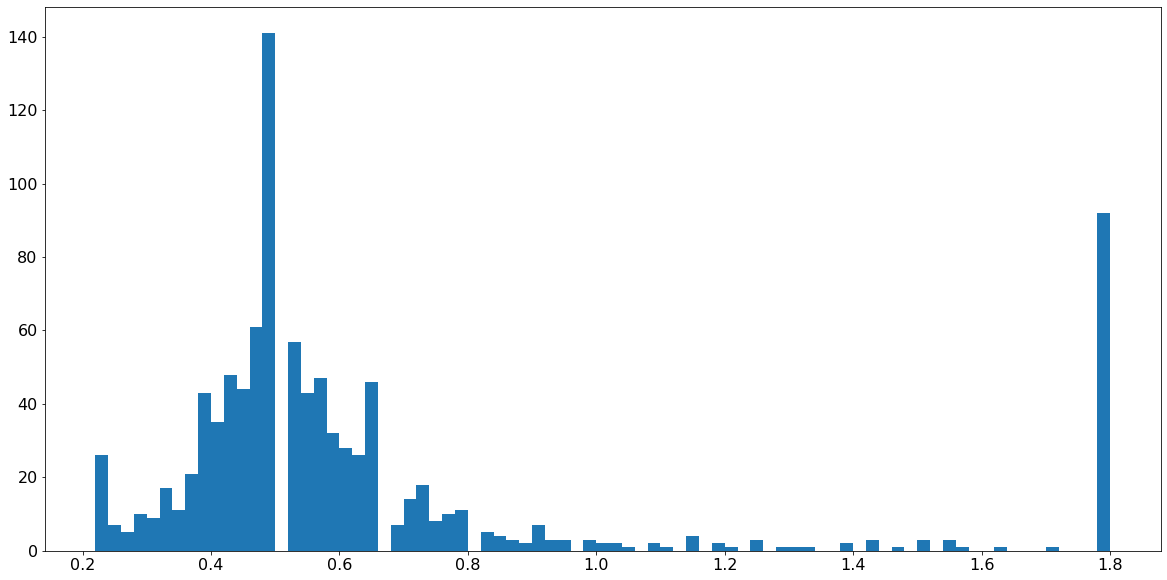

In [62]:
plt.figure(figsize=(20, 10))
plt.hist(out.values(), bins=79)

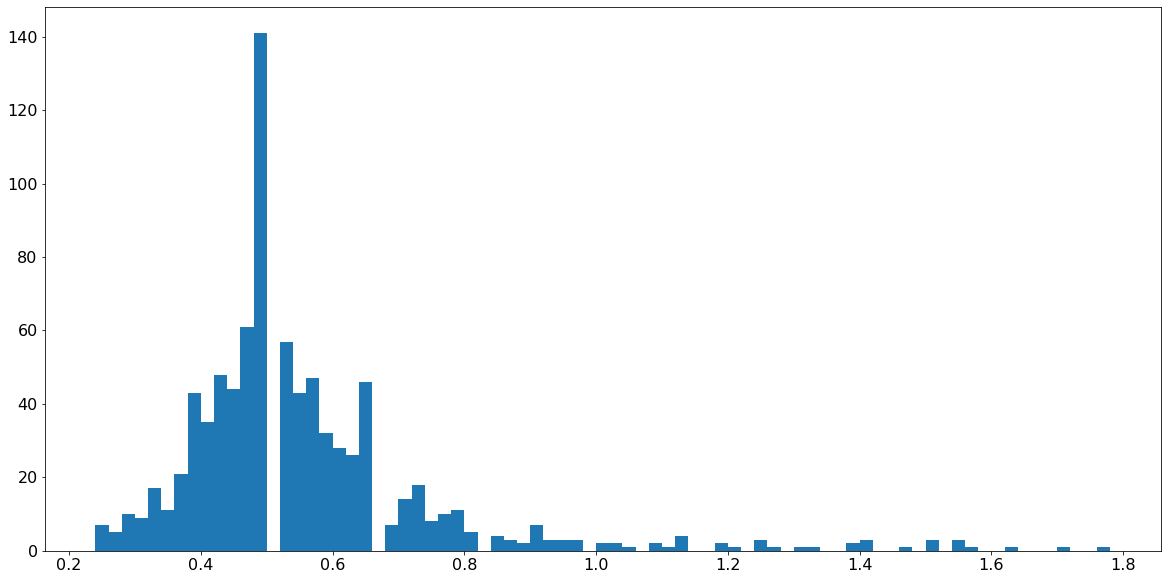

In [29]:
plt.figure(figsize=(20, 10))
counts, bins, _ = plt.hist([ x for x in out.values() if x > 0.221 and x < 1.799 ], bins=77)

In [30]:
counts, bins

(array([  7.,   5.,  10.,   9.,  17.,  11.,  21.,  43.,  35.,  48.,  44.,
         61., 141.,   0.,  57.,  43.,  47.,  32.,  28.,  26.,  46.,   0.,
          7.,  14.,  18.,   8.,  10.,  11.,   5.,   0.,   4.,   3.,   2.,
          7.,   3.,   3.,   3.,   0.,   2.,   2.,   1.,   0.,   2.,   1.,
          4.,   0.,   0.,   2.,   1.,   0.,   3.,   1.,   0.,   1.,   1.,
          0.,   0.,   2.,   3.,   0.,   0.,   1.,   0.,   3.,   0.,   3.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
        0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
        0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
        0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ,
        1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32,
        1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54,
        1.56, 1.58, 1.6 , 1.62, 1.64

In [78]:
def gaussian(x, *pars):
    A, mu, sigma = pars
    return A * np.exp(-(x-mu)**2/2/sigma**2)

(0.4865322277258035, 0.010315501445966326, 0.10248170303441356)

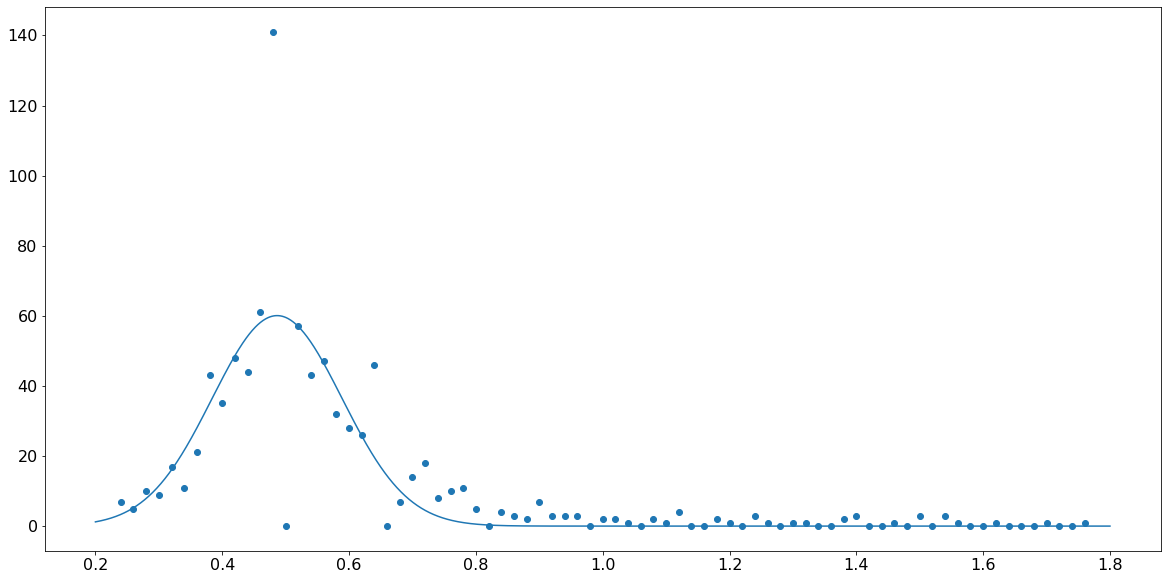

In [102]:
(A_fit, mu_fit, sigma_fit), var_matrix = curve_fit(gaussian, bins[:-1], counts, p0=[1, 0, 1])

xs = np.linspace(0.2, 1.8, 2000)
plt.figure(figsize=(20, 10))
plt.scatter(bins[:-1], counts)
plt.plot(xs, gaussian(xs, A_fit, mu_fit, sigma_fit))
mu_fit, var_matrix[1, 1]**.5, sigma_fit

In [67]:
out2 = {}
for gaia_id in DF[:1000][GAIA_ID_COLNAME]:
    min_k, min_rmse = 100, 100
    gaia_flux = plot_conv_get_gaia(gaia_id=gaia_id)
    if gaia_flux is None:
        continue
            
    for k in np.arange(0.2, 0.8, 0.0025):
        rmse = plot_conv_k_rms(gaia_flux, gaia_id=gaia_id, k=k)
        if rmse < min_rmse:
            min_rmse = rmse
            min_k = k
        else:
            break
        
    out2[gaia_id] = k
    print(f'{gaia_id}\t{k}')

calibrating gaia...


done.
3217536339907648384	0.5875000000000004
calibrating gaia...


done.
3697743267334291328	0.8000000000000005
calibrating gaia...


done.
3683666666640754048	0.6800000000000004
calibrating gaia...


done.
3683528776714709632	0.6150000000000004
calibrating gaia...


done.
3683494176458551808	0.5450000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3658537736409397888	0.8000000000000005
calibrating gaia...


done.
3694803688638177280	0.3275000000000001
calibrating gaia...


done.
3649721512875483904	0.4050000000000002
calibrating gaia...


done.
3652755958809710464	0.5400000000000003
calibrating gaia...


done.
3695425290664568704	0.46750000000000025
calibrating gaia...


done.
3649003463063106304	0.8000000000000005
calibrating gaia...


done.
3217961747828046080	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3683515410776636800	0.8000000000000005
calibrating gaia...


done.
3217574234403744000	0.46250000000000024
calibrating gaia...


done.
3637758792005488896	0.4225000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073311956582747392	0.5775000000000003
calibrating gaia...


done.
3694818222807582080	0.5500000000000003
calibrating gaia...


done.
3793876214650688640	0.3025000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3661566306828100224	0.47000000000000025
calibrating gaia...


done.
3659347256140256256	0.8000000000000005
calibrating gaia...


done.
3685958598628554240	0.2025
calibrating gaia...


done.
3602512675468007808	0.4000000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083085790322125056	0.8000000000000005
calibrating gaia...


done.
3695495659409680896	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838954920078817920	0.4200000000000002
calibrating gaia...


done.
3697644723605458688	0.5025000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685855759931545344	0.5150000000000003
calibrating gaia...


done.
3699127415035217408	0.3300000000000001
calibrating gaia...


done.
3683680170017942656	0.4425000000000002
calibrating gaia...


done.
3652781793037773824	0.35000000000000014
calibrating gaia...


done.
3685813772331365376	0.6050000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838181959109379200	0.5950000000000004
calibrating gaia...


done.
3697674513498510848	0.3950000000000002
calibrating gaia...


done.
3218157151659623808	0.5125000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073340780107949696	0.33250000000000013
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838180687799025536	0.8000000000000005
calibrating gaia...


done.
3834177232818514176	0.35000000000000014
calibrating gaia...


done.
3089590634254203264	0.34750000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3078366132362102016	0.8000000000000005
calibrating gaia...


done.
3683600043107730048	0.4275000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839626275006859008	0.4375000000000002
calibrating gaia...


done.
3683665975150552704	0.7025000000000003
calibrating gaia...


done.
3220264503133565056	0.45000000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839691244977478528	0.5175000000000003
calibrating gaia...


done.
3683699274032512256	0.46750000000000025
calibrating gaia...


done.
3683599287193483264	0.5850000000000004
calibrating gaia...


done.
3694638379640556800	0.8000000000000005
calibrating gaia...


done.
3661796005974254080	0.6075000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083030260687661696	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083035212787465216	0.8000000000000005
calibrating gaia...


done.
3026236980420116736	0.5400000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074834264791142656	0.36000000000000015
calibrating gaia...


done.
4409412751215757824	0.7950000000000006
calibrating gaia...


done.
3650283908777806592	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3832936914982882816	0.4025000000000002
calibrating gaia...


done.
3830123642684368640	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3796764146364818944	0.35500000000000015
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119315145135658624	0.5400000000000003
calibrating gaia...


done.
3638788652148365312	0.5025000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838116709965999232	0.7675000000000005
calibrating gaia...


done.
3832997830503960448	0.5250000000000004
calibrating gaia...


done.
3650568308627752704	0.8000000000000005
calibrating gaia...


done.
3602512709827746432	0.4950000000000003
calibrating gaia...


done.
4359367581824642304	0.6850000000000005
calibrating gaia...


done.
3650615686411758080	0.2025
calibrating gaia...


done.
4418207465548553600	0.8000000000000005
calibrating gaia...


done.
3218956767195945856	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3652579689056579200	0.4250000000000002
calibrating gaia...


done.
3695633716838262784	0.4200000000000002
calibrating gaia...


done.
3683700682781785984	0.5125000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3805938269523770752	0.4325000000000002
calibrating gaia...


done.
3686466843582747776	0.5325000000000003
calibrating gaia...


done.
3220655997992856448	0.44750000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3082338775250660480	0.8000000000000005
Could not get SDSS data
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3697863762641373952	0.25500000000000006
calibrating gaia...


done.
3803104651965398144	0.6475000000000004
calibrating gaia...


done.
3658947343145360000	0.48750000000000027
calibrating gaia...


done.
3652785611263875328	0.48000000000000026
calibrating gaia...


done.
3697878507264727040	0.4150000000000002
calibrating gaia...


done.
3602766422135500544	0.6900000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685843699663458176	0.6125000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3647757785108193792	0.4175000000000002
calibrating gaia...


done.
3217699514305723392	0.5025000000000003
calibrating gaia...


done.
3829993380621350656	0.5550000000000004
calibrating gaia...


done.
3796875441853068032	0.8000000000000005
calibrating gaia...


done.
3071324073920137600	0.5300000000000002
calibrating gaia...


done.
3697860949438190336	0.5050000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686611395002565504	0.36000000000000015
calibrating gaia...


done.
3658844641887514752	0.48500000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073397989071571456	0.44500000000000023
calibrating gaia...


done.
3687347694131168000	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838946123985841664	0.46000000000000024
calibrating gaia...


done.
3694071139016495232	0.8000000000000005
calibrating gaia...


done.
3662588891297034240	0.5325000000000003
calibrating gaia...


done.
3650596449253407104	0.6275000000000004
calibrating gaia...


done.
3791928837823523200	0.8000000000000005
calibrating gaia...


done.
3071219448517914368	0.48750000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083878366407415680	0.23000000000000004
calibrating gaia...


done.
3698619131425316352	0.5650000000000004
calibrating gaia...


done.
3796760611607385728	0.46750000000000025
calibrating gaia...


done.
3793828901290912000	0.5400000000000003
calibrating gaia...


done.
3226707709992430080	0.6075000000000004
calibrating gaia...


done.
3026255745133184640	0.5100000000000002
calibrating gaia...


done.
3695572453424818176	0.47500000000000026
calibrating gaia...


done.
4359367169507771264	0.6825000000000004
calibrating gaia...


done.
4409231847192105088	0.6875000000000004
calibrating gaia...


done.
3647720848389424128	0.48250000000000026
calibrating gaia...


done.
3697668912861183872	0.6400000000000003
calibrating gaia...


done.
3658775647532847744	0.7725000000000004
calibrating gaia...


done.
3694898963896826624	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083104482019670656	0.5050000000000003
calibrating gaia...


done.
3217700888695259264	0.48250000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107325108275779712	0.2025
calibrating gaia...


done.
3803142378958248960	0.5600000000000003
calibrating gaia...


done.
3695535001310137728	0.47500000000000026
calibrating gaia...


done.
3796900932483433728	0.8000000000000005
calibrating gaia...


done.
3695463773571585024	0.47750000000000026
calibrating gaia...


done.
3118674267295282176	0.5275000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3662018519639899520	0.3850000000000002
calibrating gaia...


done.
3694880517013152256	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3657976813680672512	0.2025
calibrating gaia...


done.
3796849019214227840	0.44500000000000023
calibrating gaia...


done.
3650506907775264128	0.6175000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119344213474187776	0.44750000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083087989345156096	0.5925000000000004
calibrating gaia...


done.
3637754840635519104	0.5100000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083157426079306624	0.5650000000000004
calibrating gaia...


done.
3695037094341169536	0.48750000000000027
calibrating gaia...


done.
3661526415172080256	0.8000000000000005
calibrating gaia...


done.
3697665957923744896	0.4125000000000002
calibrating gaia...


done.
3694045880312662400	0.2700000000000001
calibrating gaia...


done.
3697845792498132224	0.4175000000000002
calibrating gaia...


done.
3661782876258573184	0.3825000000000002
calibrating gaia...


done.
3650534361206238080	0.47750000000000026
calibrating gaia...


done.
3218211195232612096	0.6425000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3082342279943984768	0.8000000000000005
calibrating gaia...


done.
3686066488206991104	0.45750000000000024
calibrating gaia...


done.
3650271509207632640	0.37000000000000016
calibrating gaia...


done.
3071124306400537344	0.49250000000000027
calibrating gaia...


done.
3650394654509986304	0.46000000000000024
calibrating gaia...


done.
3071169210282825984	0.44750000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3688791039365636992	0.5875000000000004
calibrating gaia...


done.
6340922353824671232	0.5050000000000003
calibrating gaia...


done.
3683497994684983808	0.3125000000000001
calibrating gaia...


done.
4416172033303470464	0.34000000000000014
calibrating gaia...


done.
4415415805526237824	0.6950000000000005
calibrating gaia...


done.
3650749762405882752	0.37250000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073546938538407680	0.4075000000000002
calibrating gaia...


done.
3220333050811417472	0.47500000000000026
calibrating gaia...


done.
3695661891823773184	0.4425000000000002
calibrating gaia...


done.
3220676987497921536	0.5375000000000003
calibrating gaia...


done.
3687330239384068352	0.4300000000000002
calibrating gaia...


done.
3217448855717025024	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838938320029639808	0.5100000000000002
calibrating gaia...


done.
3796653031266675328	0.47000000000000025
calibrating gaia...


done.
3695084442060513792	0.4325000000000002
calibrating gaia...


done.
3794117660532024704	0.45000000000000023
calibrating gaia...


done.
3647764794494836864	0.46750000000000025
calibrating gaia...


done.
3686406507882734208	0.6750000000000005
calibrating gaia...


done.
6340959599781125376	0.8000000000000005
calibrating gaia...


done.
3661542873486819584	0.8000000000000005
calibrating gaia...


done.
3683497131395716608	0.6450000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083078780935428096	0.8000000000000005
calibrating gaia...


done.
3694839800723255168	0.44500000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685833426101670400	0.37000000000000016
calibrating gaia...


done.
3695561527027969536	0.5200000000000002
calibrating gaia...


done.
3796670967050329728	0.7475000000000005
calibrating gaia...


done.
3649842248700471936	0.5475000000000003
calibrating gaia...


done.
3650802848201638528	0.5150000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3830889207719998080	0.3825000000000002
calibrating gaia...


done.
3686398433344160512	0.6225000000000004
calibrating gaia...


done.
3121404045426899712	0.6450000000000005
calibrating gaia...


done.
3686333669532459008	0.3975000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3082358566459685504	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
4419194345954599808	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3695633579399309696	0.3025000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073636415591097088	0.3925000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073572437759012480	0.37750000000000017
calibrating gaia...


done.
3791700105044983296	0.6400000000000003
calibrating gaia...


done.
3695620385259865856	0.48250000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686760550626623616	0.46000000000000024
calibrating gaia...


done.
3650418637607371136	0.46250000000000024
calibrating gaia...


done.
3218216830229745152	0.5425000000000003
calibrating gaia...


done.
4406962283393008768	0.5425000000000003
calibrating gaia...


done.
3793706305744167296	0.45500000000000024
calibrating gaia...


done.
3830770636557923712	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685866102212768896	0.46750000000000025
calibrating gaia...


done.
3217677902030274432	0.3125000000000001
calibrating gaia...


done.
3833021199421007232	0.7300000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3659410301965374464	0.7100000000000004
calibrating gaia...


done.
3638529584016341888	0.8000000000000005
calibrating gaia...


done.
4404215802128189824	0.8000000000000005
calibrating gaia...


done.
3661816583162477952	0.8000000000000005
calibrating gaia...


done.
3794053682699215872	0.3950000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685835586469878144	0.2025
calibrating gaia...


done.
3220333806724676480	0.8000000000000005
calibrating gaia...


done.
3794077043025798144	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685883866197604736	0.3075000000000001
calibrating gaia...


done.
4415606261555475584	0.8000000000000005
calibrating gaia...


done.
3695839119353538304	0.5200000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840471520275723008	0.44500000000000023
calibrating gaia...


done.
3071299437988562944	0.45250000000000024
calibrating gaia...


done.
3697717669329990656	0.6325000000000004
calibrating gaia...


done.
3602575721291710720	0.3900000000000002
calibrating gaia...


done.
3652831580298304640	0.5575000000000003
calibrating gaia...


done.
3794112953247833216	0.4025000000000002
calibrating gaia...


done.
3833164372155832576	0.6100000000000003
calibrating gaia...


done.
3121421568894419456	0.5975000000000004
calibrating gaia...


done.
3686790928930693632	0.45250000000000024
calibrating gaia...


done.
3686336727549178112	0.45750000000000024
calibrating gaia...


done.
3071345273878748288	0.5000000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3638786388700921472	0.5475000000000003
calibrating gaia...


done.
3694874366619968768	0.5425000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073637785686378112	0.8000000000000005
calibrating gaia...


done.
3220651874824138880	0.45750000000000024
calibrating gaia...


done.
3695086641083731072	0.8000000000000005
calibrating gaia...


done.
3695424874052189312	0.5425000000000003
calibrating gaia...


done.
3217703770616216064	0.45250000000000024
calibrating gaia...


done.
3638489894223118720	0.6950000000000005
calibrating gaia...


done.
3694912299771150976	0.4000000000000002
calibrating gaia...


done.
3683519503881169408	0.48250000000000026
calibrating gaia...


done.
3653053651582820992	0.5075000000000003
calibrating gaia...


done.
3683565545930484096	0.4375000000000002
calibrating gaia...


done.
6339940970977504128	0.4400000000000002
calibrating gaia...


done.
3650426742210702976	0.8000000000000005
calibrating gaia...


done.
3688685524904418688	0.5125000000000003
calibrating gaia...


done.
3697897886157114240	0.37250000000000016
calibrating gaia...


done.
3217670514686901888	0.48750000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3659553242771650432	0.3925000000000002
calibrating gaia...


done.
3658821036747324800	0.5250000000000004
calibrating gaia...


done.
3638457669084084224	0.48500000000000026
calibrating gaia...


done.
3686418091409592832	0.36750000000000016
calibrating gaia...


done.
3071286690525620736	0.45750000000000024
calibrating gaia...


done.
3695078188588164352	0.34250000000000014
calibrating gaia...


done.
3662625896735209216	0.48500000000000026
calibrating gaia...


done.
3220666752590825984	0.8000000000000005
calibrating gaia...


done.
3796960516565302784	0.6175000000000004
calibrating gaia...


done.
3698048965927359488	0.3050000000000001
calibrating gaia...


done.
4404150522924928000	0.8000000000000005
calibrating gaia...


done.
3071139660908721920	0.2975000000000001
calibrating gaia...


done.
3698112016047184256	0.23000000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073336386356643200	0.5125000000000003
calibrating gaia...


done.
3659498232830774912	0.6225000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074888789400038912	0.8000000000000005
calibrating gaia...


done.
3797134750503137920	0.5525000000000003
calibrating gaia...


done.
3689576610359318144	0.8000000000000005
calibrating gaia...


done.
3686459735412518144	0.4100000000000002
calibrating gaia...


done.
3797169595572945536	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073311162013249280	0.4375000000000002
calibrating gaia...


done.
3697920426145562240	0.4425000000000002
calibrating gaia...


done.
3659587701293876352	0.7750000000000006
calibrating gaia...


done.
3650663450743252864	0.4375000000000002
calibrating gaia...


done.
4406556804121043200	0.3225000000000001
calibrating gaia...


done.
3697635824433213440	0.45500000000000024
calibrating gaia...


done.
3696410899760083712	0.45250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083893965728653440	0.49250000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107325005196586112	0.4075000000000002
calibrating gaia...


done.
4404278714812145024	0.8000000000000005
calibrating gaia...


done.
3805815227300905344	0.7125000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840529588233034496	0.5225000000000003
calibrating gaia...


done.
3217633577967729664	0.3175000000000001
calibrating gaia...


done.
3077106714807848448	0.5050000000000003
calibrating gaia...


done.
3662008035624531456	0.47000000000000025
calibrating gaia...


done.
3602564799191078272	0.44500000000000023
calibrating gaia...


done.
3698031236302386432	0.3875000000000002
calibrating gaia...


done.
3652808250036399360	0.6100000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686620229750494336	0.2700000000000001
calibrating gaia...


done.
3695442607972692096	0.48500000000000026
calibrating gaia...


done.
3658947892901176320	0.6425000000000004
calibrating gaia...


done.
3683675183560485760	0.7725000000000004
calibrating gaia...


done.
3683535923540321792	0.34750000000000014
Could not get SDSS data
calibrating gaia...


done.
3695661754384818432	0.6225000000000004
calibrating gaia...


done.
3220651393787995648	0.5100000000000002
calibrating gaia...


done.
3686378951372307200	0.5175000000000003
calibrating gaia...


done.
4404373960003929984	0.8000000000000005
calibrating gaia...


done.
6340861674525902080	0.8000000000000005


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839215053363177984	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687402497913872640	0.8000000000000005
calibrating gaia...


done.
3602768689878233728	0.5375000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840480011426102400	0.4350000000000002
calibrating gaia...


done.
3686469180045558144	0.3225000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3782955448550910464	0.8000000000000005
calibrating gaia...


done.
3803126612133187584	0.5475000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3218222155989192576	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074850100334553856	0.8000000000000005
calibrating gaia...


done.
3217685323733755904	0.5975000000000004
calibrating gaia...


done.
3220534257144314752	0.34500000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840476674236540288	0.48000000000000026
calibrating gaia...


done.
3832752952943602816	0.48750000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3218328293220715264	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687371780307844736	0.2025
calibrating gaia...


done.
3651303503949657088	0.4025000000000002
calibrating gaia...


done.
4359165001103633792	0.8000000000000005
calibrating gaia...


done.
3695103477355606656	0.37750000000000017
calibrating gaia...


done.
3683360173479011712	0.35750000000000015
calibrating gaia...


done.
3220542469121877888	0.5200000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686469012541871104	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083887364360612736	0.5250000000000004
calibrating gaia...


done.
3794214073957976064	0.5000000000000002
calibrating gaia...


done.
3661690860879324032	0.7500000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3218267686938289408	0.2025
calibrating gaia...


done.
3685605444942257280	0.48500000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119307585993288704	0.24750000000000005
calibrating gaia...


done.
3695433537001757824	0.4975000000000003
calibrating gaia...


done.
4404188730953874560	0.7825000000000004
calibrating gaia...


done.
3217763457778740480	0.44500000000000023
calibrating gaia...


done.
3220654211286290944	0.5150000000000003
calibrating gaia...


done.
3695395569490973824	0.5000000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686598956777262336	0.3975000000000002
calibrating gaia...


done.
6340968189715790080	0.6150000000000004
calibrating gaia...


done.
3686069198330537216	0.4025000000000002
calibrating gaia...


done.
3649820395907751168	0.20750000000000002
calibrating gaia...


done.
3696354309270984576	0.5200000000000002
calibrating gaia...


done.
3695104267629590400	0.4125000000000002
calibrating gaia...


done.
3683712326437209984	0.7125000000000004
calibrating gaia...


done.
3650599846572239872	0.37250000000000016
calibrating gaia...


done.
3217650826556478464	0.48500000000000026
calibrating gaia...


done.
3659598219669223936	0.3925000000000002
calibrating gaia...


done.
3683484869264867200	0.5450000000000004
calibrating gaia...


done.
3659324922310356480	0.37250000000000016
calibrating gaia...


done.
3650032601651499904	0.8000000000000005
calibrating gaia...


done.
3793987334044529024	0.45750000000000024
calibrating gaia...


done.
6340815181505322624	0.8000000000000005
calibrating gaia...


done.
4416907056826497280	0.37250000000000016
calibrating gaia...


done.
3650547654129188736	0.45750000000000024
calibrating gaia...


done.
3650405679690234368	0.5100000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073477123844735616	0.47250000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110009497196165376	0.4275000000000002
calibrating gaia...


done.
3832844040609923456	0.6375000000000004
calibrating gaia...


done.
3695680824039583360	0.45000000000000023
Could not get SDSS data
calibrating gaia...


done.
3694895772737064832	0.48750000000000027
calibrating gaia...


done.
3832844074969661568	0.8000000000000005
calibrating gaia...


done.
3797174882677180544	0.4375000000000002
calibrating gaia...


done.
6340748008217013248	0.6225000000000004
calibrating gaia...


done.
3695466453631180032	0.5175000000000003
Could not get SDSS data
calibrating gaia...


done.
3689645256821317888	0.49250000000000027
calibrating gaia...


done.
3683759124400598912	0.8000000000000005
calibrating gaia...


done.
3694965523006178816	0.4375000000000002
calibrating gaia...


done.
3803237216131057792	0.5325000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838186498889866496	0.47250000000000025
calibrating gaia...


done.
3695778916795991296	0.6900000000000004
calibrating gaia...


done.
3071351699149736704	0.47750000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107335106959817344	0.7525000000000004
calibrating gaia...


done.
3686468149252815744	0.3875000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687364457387931648	0.8000000000000005
calibrating gaia...


done.
3796849878207689088	0.4950000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107322874892919680	0.2025
calibrating gaia...


done.
3794073400893507200	0.4950000000000003
calibrating gaia...


done.
3683700579702588160	0.35750000000000015
calibrating gaia...


done.
3650633660850160768	0.5475000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839740005740717824	0.5400000000000003
calibrating gaia...


done.
3650588851455696768	0.6000000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083882386496776704	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686097819992699776	0.5125000000000003
calibrating gaia...


done.
3797147463606404608	0.46500000000000025
calibrating gaia...


done.
3833066519915872640	0.4000000000000002
calibrating gaia...


done.
3830169955316412416	0.4375000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3081583204603528448	0.8000000000000005
calibrating gaia...


done.
3686401766238800896	0.5050000000000003
calibrating gaia...


done.
3697860056084990464	0.3875000000000002
calibrating gaia...


done.
3121333981624149888	0.46500000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840525499424146944	0.45500000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
4418502619997175168	0.22750000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840499905714564864	0.4275000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073323840756827776	0.2025
calibrating gaia...


done.
3602824043416667648	0.6300000000000003
calibrating gaia...


done.
3695696973116509568	0.4150000000000002
calibrating gaia...


done.
3652615427479787520	0.8000000000000005
calibrating gaia...


done.
3696359050914927360	0.49250000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839025731204961024	0.5050000000000003
calibrating gaia...


done.
3685053666199144320	0.5000000000000002
calibrating gaia...


done.
3797125615107946368	0.8000000000000005
calibrating gaia...


done.
3695090180136824320	0.5575000000000003
calibrating gaia...


done.
3071157154310391168	0.49000000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083917673947907584	0.8000000000000005
calibrating gaia...


done.
3071357432929376640	0.5075000000000003
calibrating gaia...


done.
3796999274350204288	0.49000000000000027
calibrating gaia...


done.
3698672732617073792	0.44750000000000023
calibrating gaia...


done.
3220678915938114048	0.6275000000000004
calibrating gaia...


done.
3683505897424769408	0.37250000000000016
calibrating gaia...


done.
4416079773109897216	0.4050000000000002
calibrating gaia...


done.
3602821844393450240	0.5925000000000004
calibrating gaia...


done.
4415625777887603840	0.4000000000000002
calibrating gaia...


done.
4383162117260295936	0.5475000000000003
calibrating gaia...


done.
3685559918289189504	0.3000000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073419773145786496	0.46750000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110331069986591616	0.6500000000000004
calibrating gaia...


done.
3071239102288243200	0.48500000000000026
calibrating gaia...


done.
3832997972237880064	0.36750000000000016
calibrating gaia...


done.
3695378866362515200	0.36000000000000015
calibrating gaia...


done.
3695798746660959488	0.5225000000000003
calibrating gaia...


done.
3782736542657676160	0.47500000000000026
calibrating gaia...


done.
3832835175797426688	0.3850000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
4418382665854739584	0.4350000000000002
calibrating gaia...


done.
3695643131406586624	0.44750000000000023
calibrating gaia...


done.
3694861447358383104	0.4325000000000002
calibrating gaia...


done.
3602632724097449856	0.5675000000000003
calibrating gaia...


done.
3650813465360878208	0.3900000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3796601418644353536	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840463724910095872	0.4050000000000002
calibrating gaia...


done.
3695477861064286592	0.4350000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073615181274316672	0.3975000000000002
calibrating gaia...


done.
3601736965718118272	0.47000000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083880496711195776	0.8000000000000005
calibrating gaia...


done.
3650779311780915712	0.5100000000000002
calibrating gaia...


done.
3696343176715795456	0.5550000000000004
calibrating gaia...


done.
3683737958801889792	0.4400000000000002
calibrating gaia...


done.
3686771756196717056	0.46000000000000024
calibrating gaia...


done.
6340961931947961728	0.8000000000000005
calibrating gaia...


done.
3685908295971527040	0.5125000000000003
calibrating gaia...


done.
4415667907222095488	0.6075000000000004
calibrating gaia...


done.
3695371723832483200	0.46250000000000024
calibrating gaia...


done.
3077168351883298048	0.45750000000000024
calibrating gaia...


done.
3697710659943357056	0.4250000000000002
calibrating gaia...


done.
3217772833690616448	0.5000000000000002
calibrating gaia...


done.
3695303966428580864	0.8000000000000005
calibrating gaia...


done.
3071322252854056192	0.5425000000000003
Could not get SDSS data
calibrating gaia...


done.
3071319675873680128	0.44500000000000023
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3659013687505097344	0.3050000000000001
calibrating gaia...


done.
3827758623237442560	0.8000000000000005
calibrating gaia...


done.
3661739174966360448	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3695557880599159424	0.8000000000000005
calibrating gaia...


done.
3695771602467678080	0.6700000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839714510814923520	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839222891678517632	0.7125000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3827817996865666560	0.5700000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074851268566245632	0.5175000000000003
calibrating gaia...


done.
3688863126096284928	0.5450000000000004
calibrating gaia...


done.
3695772869482435712	0.5650000000000004
calibrating gaia...


done.
3071168493024023168	0.4125000000000002
calibrating gaia...


done.
3650425269036875904	0.36500000000000016
calibrating gaia...


done.
3806105017334133376	0.4375000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083098052450542976	0.8000000000000005
calibrating gaia...


done.
3650510476893001344	0.5875000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840502203522211584	0.35500000000000015
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3689654911907850880	0.34750000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119311709161908480	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3689598424497882624	0.3850000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3650062494623367168	0.33750000000000013
calibrating gaia...


done.
3796969720679730048	0.36750000000000016
calibrating gaia...


done.
3806671094023848576	0.4950000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687324295149381888	0.2875000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107382145441130752	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3649582248560742656	0.4300000000000002
calibrating gaia...


done.
3652657105842366592	0.5925000000000004
calibrating gaia...


done.
3652786946998059520	0.5275000000000003
calibrating gaia...


done.
4415981916575038080	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3653554096877139200	0.4300000000000002
calibrating gaia...


done.
4414621339655336320	0.25500000000000006
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3653586296246976128	0.2025
calibrating gaia...


done.
3647588048000644480	0.8000000000000005
calibrating gaia...


done.
3796993295755711360	0.4300000000000002
calibrating gaia...


done.
4406459119386466176	0.22250000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3694777197279912704	0.3925000000000002
calibrating gaia...


done.
3833203787070793728	0.45500000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3791980072487884672	0.6150000000000004
calibrating gaia...


done.
3803143104807606016	0.5400000000000003
calibrating gaia...


done.
3683820765771292160	0.6975000000000005
calibrating gaia...


done.
3659420992138802176	0.8000000000000005
calibrating gaia...


done.
3695709858018452736	0.47250000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839626962201614208	0.8000000000000005
calibrating gaia...


done.
4404379118261464576	0.5925000000000004
calibrating gaia...


done.
3698040822669320064	0.5475000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110013409904120576	0.4225000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686070267778211456	0.24000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073586795834601728	0.48250000000000026
calibrating gaia...


done.
3683627840135415808	0.5125000000000003
calibrating gaia...


done.
3220714546986694656	0.5175000000000003
calibrating gaia...


done.
3833160493800483456	0.5175000000000003
calibrating gaia...


done.
3697914786852477952	0.6775000000000004
calibrating gaia...


done.
3217681093188852480	0.5225000000000003
calibrating gaia...


done.
3121586117681390336	0.7550000000000006
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838939252037697536	0.47250000000000025
calibrating gaia...


done.
3218300053811746816	0.5250000000000004
calibrating gaia...


done.
3683536649390473472	0.4125000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073323535815310080	0.6325000000000004
calibrating gaia...


done.
3791870190045656320	0.2025
calibrating gaia...


done.
3695460681195131648	0.36500000000000016
calibrating gaia...


done.
3695644368357112448	0.5050000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083863385561346432	0.8000000000000005
calibrating gaia...


done.
3121384219858171008	0.3825000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
6340784257740505472	0.2900000000000001
calibrating gaia...


done.
3695115709422466304	0.5050000000000003
calibrating gaia...


done.
3217622789009986944	0.47250000000000025
calibrating gaia...


done.
3651337378355933184	0.6400000000000003
calibrating gaia...


done.
3647543341685944192	0.5825000000000004
calibrating gaia...


done.
3661548542843310336	0.6550000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110330928248256128	0.36750000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3697887372077236224	0.2875000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083176362592994176	0.5825000000000004
calibrating gaia...


done.
3217702022566593280	0.5500000000000003
calibrating gaia...


done.
3217708963233735040	0.6650000000000005
Could not get SDSS data
calibrating gaia...


done.
3695089527301792896	0.44500000000000023
calibrating gaia...


done.
4406574087069487232	0.5075000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110324915293755648	0.2025
calibrating gaia...


done.
3650483852390820736	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107338336775098496	0.6675000000000004
calibrating gaia...


done.
3793715548513800064	0.36250000000000016
calibrating gaia...


done.
3697889742899186176	0.4975000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3683782802557251456	0.5475000000000003
calibrating gaia...


done.
3694859832450648576	0.48250000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073582127205191424	0.3925000000000002
calibrating gaia...


done.
3698088617065361920	0.36250000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107341424852452864	0.22000000000000003
calibrating gaia...


done.
3697824558179807488	0.6950000000000005
calibrating gaia...


done.
6340971110293554944	0.38000000000000017
calibrating gaia...


done.
3833029205240042368	0.4275000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110199678346704640	0.48250000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839550683582218880	0.25250000000000006
calibrating gaia...


done.
3220300026807690112	0.3125000000000001
calibrating gaia...


done.
3650671417907498752	0.3100000000000001
calibrating gaia...


done.
3805809351785629824	0.3975000000000002
calibrating gaia...


done.
3220349165528713216	0.45500000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074843576280156928	0.8000000000000005
calibrating gaia...


done.
3694006439629179392	0.5400000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083160179156076672	0.6400000000000003
calibrating gaia...


done.
3686374214023732352	0.3925000000000002
calibrating gaia...


done.
4359245712130514048	0.45250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839741616357319936	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110193111335446784	0.2875000000000001
calibrating gaia...


done.
4359351746282303232	0.6275000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3689022628297503232	0.7600000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074357798298718464	0.4400000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074863088316386176	0.5875000000000004
calibrating gaia...


done.
3695111139577268096	0.5100000000000002
calibrating gaia...


done.
3697959836765409408	0.5650000000000004
calibrating gaia...


done.
3688822654620352128	0.48500000000000026
calibrating gaia...


done.
3832976905423004800	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3658832439885180416	0.6150000000000004
calibrating gaia...


done.
3071309436672361600	0.5450000000000004
calibrating gaia...


done.
3697660735243545728	0.5025000000000003
calibrating gaia...


done.
3220640398671592448	0.4050000000000002
calibrating gaia...


done.
3697885894608423552	0.3900000000000002
calibrating gaia...


done.
3686461586542762368	0.8000000000000005
calibrating gaia...


done.
3602612593586661760	0.46000000000000024
calibrating gaia...


done.
3226711420844168832	0.8000000000000005
calibrating gaia...


done.
3793139709363497728	0.8000000000000005
calibrating gaia...


done.
3688743352344308608	0.8000000000000005
calibrating gaia...


done.
3653576705585074304	0.35000000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3647587871907182592	0.24750000000000005
calibrating gaia...


done.
3650643384656034304	0.4050000000000002
calibrating gaia...


done.
3694868319306032000	0.5050000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838955637338556800	0.5025000000000003
calibrating gaia...


done.
4416214841242090240	0.49250000000000027
Could not get SDSS data
calibrating gaia...


done.
3697872906627178496	0.36250000000000016
calibrating gaia...


done.
3602584727839301888	0.4400000000000002
calibrating gaia...


done.
4407027906195391360	0.5925000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838895610875095168	0.6050000000000004
calibrating gaia...


done.
4415597023080841472	0.5750000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3842065090580902144	0.8000000000000005
calibrating gaia...


done.
3686528867206304768	0.4325000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083091386661691648	0.7775000000000005
calibrating gaia...


done.
3220709736623330688	0.6950000000000005
calibrating gaia...


done.
3795411510839975680	0.34500000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3217425869052312704	0.24000000000000005
calibrating gaia...


done.
3658759940837042560	0.8000000000000005
calibrating gaia...


done.
3637754905059640832	0.8000000000000005
calibrating gaia...


done.
3650585797734607232	0.26500000000000007
calibrating gaia...


done.
3686799278347155584	0.6050000000000004
calibrating gaia...


done.
4404354963365319552	0.5950000000000004
calibrating gaia...


done.
3695660689232850816	0.5850000000000004
calibrating gaia...


done.
3071406915249032064	0.5475000000000003
calibrating gaia...


done.
3830163255167397760	0.8000000000000005
calibrating gaia...


done.
3695554655080432896	0.6275000000000004
calibrating gaia...


done.
3650436912692498560	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686579680963508992	0.2950000000000001
calibrating gaia...


done.
3218164156750780032	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840526603231287680	0.48000000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839231687771556480	0.46250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073424587805242496	0.45500000000000024
calibrating gaia...


done.
3686448465418276864	0.4950000000000003
calibrating gaia...


done.
4359348379027860352	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839694715311057536	0.36000000000000015
calibrating gaia...


done.
3695072484871591936	0.47500000000000026
calibrating gaia...


done.
3796960069888703232	0.33500000000000013
calibrating gaia...


done.
3071343590251519104	0.5125000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687350026298207616	0.36750000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074854914993875456	0.5325000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119347924325913344	0.7200000000000004
calibrating gaia...


done.
3638709865268223872	0.4175000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3697865347484702592	0.37000000000000016
calibrating gaia...


done.
3797004531390178304	0.45000000000000023
calibrating gaia...


done.
3217636258027316352	0.4075000000000002
calibrating gaia...


done.
3686354487238541056	0.3850000000000002
calibrating gaia...


done.
3659467614008388096	0.5125000000000003
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3842163535526925056	0.7475000000000005
calibrating gaia...


done.
3694914326995743872	0.4050000000000002
calibrating gaia...


done.
3650558241224402816	0.5775000000000003
calibrating gaia...


done.
3650620569789758336	0.5375000000000003
calibrating gaia...


done.
3796759409016566784	0.48250000000000026
calibrating gaia...


done.
3638676368818791424	0.8000000000000005
calibrating gaia...


done.
3830117698449652736	0.4350000000000002
calibrating gaia...


done.
3071312357249930752	0.5800000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110151639134427008	0.6275000000000004
calibrating gaia...


done.
3121573988691758208	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3803704611652068480	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107415504447579008	0.7425000000000004
calibrating gaia...


done.
3652695687533068160	0.5525000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083032601447337344	0.49000000000000027
calibrating gaia...


done.
3841849551942258432	0.8000000000000005
calibrating gaia...


done.
3220332187522197760	0.45500000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074923978067993728	0.4150000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3638711377096712448	0.8000000000000005
calibrating gaia...


done.
3077175262485719808	0.48000000000000026
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3652537980629506304	0.49250000000000027
calibrating gaia...


done.
3650498146042078464	0.49250000000000027
calibrating gaia...


done.
3682802308766368512	0.7225000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686613216068706432	0.4325000000000002
calibrating gaia...


done.
3652580999021856000	0.6250000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686568479689109248	0.4225000000000002
calibrating gaia...


done.
3806132951801415936	0.5975000000000004
calibrating gaia...


done.
3688735449604436736	0.5650000000000004
calibrating gaia...


done.
3218267854440846720	0.2850000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073335115046478976	0.5050000000000003
calibrating gaia...


done.
3796681171892324096	0.8000000000000005
calibrating gaia...


done.
3782857561951667200	0.5700000000000003
calibrating gaia...


done.
3689609733147117056	0.5375000000000003
calibrating gaia...


done.
4407270833844020736	0.6950000000000005
calibrating gaia...


done.
3660339943341451392	0.7050000000000005
calibrating gaia...


done.
3220284569220724480	0.45250000000000024
calibrating gaia...


done.
3217626976602419712	0.6750000000000005
calibrating gaia...


done.
3638662693642865024	0.4175000000000002
calibrating gaia...


done.
3071289748542317312	0.5275000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838191515411667072	0.49250000000000027
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3649003527487169920	0.47750000000000026
calibrating gaia...


done.
3698095656515688832	0.6950000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839457534331602176	0.34000000000000014
calibrating gaia...


done.
3220346790411903488	0.45250000000000024
calibrating gaia...


done.
3794236510867133056	0.4100000000000002
calibrating gaia...


done.
3647705695744768640	0.8000000000000005
calibrating gaia...


done.
4404387330238533888	0.37500000000000017
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838188148157306496	0.6075000000000004
calibrating gaia...


done.
3683676046849371008	0.8000000000000005
calibrating gaia...


done.
3697663170488871936	0.5650000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3659291726507783808	0.4225000000000002
calibrating gaia...


done.
3220282232758710528	0.26750000000000007
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686555667802131584	0.6350000000000005
calibrating gaia...


done.
3683528231254567296	0.5575000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838934059422463360	0.4225000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083090291447609344	0.6050000000000004
calibrating gaia...


done.
3796694915787642240	0.3950000000000002
calibrating gaia...


done.
3796693708901693696	0.3050000000000001
calibrating gaia...


done.
4407017499492526848	0.8000000000000005
calibrating gaia...


done.
3686622493197487360	0.49000000000000027
calibrating gaia...


done.
4407276159603562368	0.46500000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3218171269216402304	0.7400000000000004
calibrating gaia...


done.
3697889502381056640	0.48000000000000026
calibrating gaia...


done.
3685885790342886016	0.46750000000000025
calibrating gaia...


done.
3650815664384143360	0.46750000000000025
calibrating gaia...


done.
3650400048988795008	0.6050000000000004
calibrating gaia...


done.
3071240854634636416	0.47000000000000025
calibrating gaia...


done.
3839784875264365952	0.8000000000000005
calibrating gaia...


done.
3695802010836193024	0.3825000000000002
calibrating gaia...


done.
3683519637024466176	0.8000000000000005
calibrating gaia...


done.
3833064797633563904	0.4225000000000002
calibrating gaia...


done.
3218198516489136000	0.5175000000000003
calibrating gaia...


done.
4404385951552991104	0.6775000000000004
calibrating gaia...


done.
3661886578244563968	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119339265671367936	0.8000000000000005
calibrating gaia...


done.
3832800781699354496	0.46000000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686612498809446784	0.5800000000000003
calibrating gaia...


done.
3695664223989478912	0.5550000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073308619392617984	0.26750000000000007
calibrating gaia...


done.
3683746656111622912	0.36000000000000015
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073369955821132288	0.5400000000000003
calibrating gaia...


done.
3697793256458079744	0.5325000000000003
calibrating gaia...


done.
3830154596513569792	0.47250000000000025
calibrating gaia...


done.
3652692011041027584	0.3950000000000002
calibrating gaia...


done.
3662642556913072128	0.6475000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838186735113049216	0.4200000000000002
calibrating gaia...


done.
3217673705846995840	0.8000000000000005
calibrating gaia...


done.
3071349942506292608	0.4250000000000002
calibrating gaia...


done.
3698037455414958720	0.5075000000000003
calibrating gaia...


done.
3694833787769080448	0.49000000000000027
calibrating gaia...


done.
3806107319436598656	0.48500000000000026
calibrating gaia...


done.
3650232991940987904	0.5375000000000003
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083164886440141952	0.5825000000000004
calibrating gaia...


done.
3827888606128205568	0.7275000000000005
calibrating gaia...


done.
3697710831742050304	0.48000000000000026
calibrating gaia...


done.
3638723132422594048	0.5525000000000003
calibrating gaia...


done.
3797153343416821120	0.5600000000000003
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3652897173038912768	0.7450000000000006
calibrating gaia...


done.
3695388079067986048	0.36000000000000015
calibrating gaia...


done.
3839953100542717568	0.3925000000000002
calibrating gaia...


done.
3220679633197825536	0.4350000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687401020445074176	0.34750000000000014
calibrating gaia...


done.
3698042502000377984	0.5925000000000004
calibrating gaia...


done.
6340434853561509376	0.8000000000000005
calibrating gaia...


done.
3661716738057880320	0.6125000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839886614449304960	0.8000000000000005
calibrating gaia...


done.
4407169678771671424	0.8000000000000005
calibrating gaia...


done.
3683599523416227200	0.5700000000000003
calibrating gaia...


done.
3796783598272419200	0.46000000000000024
calibrating gaia...


done.
3839799718671206400	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110181291587609984	0.5875000000000004
calibrating gaia...


done.
3694839010449272448	0.4325000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074841789573836672	0.8000000000000005
calibrating gaia...


done.
3694894776304609024	0.8000000000000005
calibrating gaia...


done.
3071232505218254208	0.45250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3683616535782123136	0.3925000000000002
calibrating gaia...


done.
3651305423799211008	0.8000000000000005
calibrating gaia...


done.
3683704458057030016	0.45000000000000023
calibrating gaia...


done.
3842068045518402176	0.7350000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3659878388975309696	0.8000000000000005
calibrating gaia...


done.
4418360847421697536	0.8000000000000005
calibrating gaia...


done.
3650559203297079680	0.6050000000000004
calibrating gaia...


done.
3805822953946469504	0.5475000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840535223230116352	0.45250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3695073893620867584	0.48000000000000026
calibrating gaia...


done.
3696337747877129344	0.46500000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839916889673837568	0.37000000000000016
calibrating gaia...


done.
3797124206358613504	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3082357982344153728	0.8000000000000005
calibrating gaia...


done.
3071338844311605120	0.8000000000000005
calibrating gaia...


done.
3833019996830176896	0.4375000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687406689801959680	0.36500000000000016
calibrating gaia...


done.
3695792252670404736	0.46500000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110005369725220608	0.5775000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685903000276122752	0.8000000000000005
calibrating gaia...


done.
3683692161566632960	0.34750000000000014
calibrating gaia...


done.
3217647940338452224	0.47000000000000025
calibrating gaia...


done.
3652807219244235520	0.3025000000000001
calibrating gaia...


done.
3694879280062568960	0.4050000000000002
calibrating gaia...


done.
3649817544048524928	0.6075000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686708431198847488	0.36500000000000016
calibrating gaia...


done.
3602513603180956544	0.3925000000000002
calibrating gaia...


done.
3218417323599697664	0.2025
calibrating gaia...


done.
3650588649592893696	0.5300000000000002
calibrating gaia...


done.
3686525465592210048	0.4350000000000002
calibrating gaia...


done.
3832998208461084416	0.5650000000000004
calibrating gaia...


done.
3794102851484728704	0.5050000000000003
calibrating gaia...


done.
3805983590018697728	0.22750000000000004
calibrating gaia...


done.
3650507113933754496	0.6300000000000003
calibrating gaia...


done.
3661663995859484032	0.4425000000000002
calibrating gaia...


done.
3652783648463674112	0.5625000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686013024454047872	0.38000000000000017
calibrating gaia...


done.
3696408215404657024	0.7325000000000004
calibrating gaia...


done.
3830536745523758080	0.7625000000000004
calibrating gaia...


done.
3077142861252533120	0.48750000000000027
calibrating gaia...


done.
4415977591544125440	0.8000000000000005
calibrating gaia...


done.
3652781831692651008	0.37000000000000016
calibrating gaia...


done.
3794088763992019200	0.5225000000000003
calibrating gaia...


done.
3650361286908836992	0.8000000000000005
calibrating gaia...


done.
3695108734395598336	0.47750000000000026
calibrating gaia...


done.
3121600239534111360	0.8000000000000005
calibrating gaia...


done.
3685987220290540800	0.7350000000000005
calibrating gaia...


done.
3698037936451297792	0.4075000000000002
calibrating gaia...


done.
3647681364755210368	0.7250000000000005
calibrating gaia...


done.
3697625722670098176	0.46500000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687358276930662400	0.5350000000000004
calibrating gaia...


done.
3658969092859703424	0.6375000000000004
calibrating gaia...


done.
3830087423225214592	0.5225000000000003
calibrating gaia...


done.
3687402291755444736	0.8000000000000005
calibrating gaia...


done.
3697852600021796352	0.5750000000000004
calibrating gaia...


done.
3796680656496249216	0.6750000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110328046329522816	0.36250000000000016
calibrating gaia...


done.
3695655226034493056	0.4950000000000003
calibrating gaia...


done.
3071367607708624896	0.45250000000000024
calibrating gaia...


done.
3602708457256686080	0.5000000000000002
calibrating gaia...


done.
3686458700325364992	0.8000000000000005
calibrating gaia...


done.
3602759275309872512	0.3050000000000001
calibrating gaia...


done.
3695469477288120832	0.5050000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839700934423792640	0.47000000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083123242436666496	0.45250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3694894054750103168	0.36500000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083921694037243392	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
6340848098134856192	0.3200000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083095342329308288	0.7100000000000004
calibrating gaia...


done.
3652735480405648896	0.7900000000000005
calibrating gaia...


done.
3694910203827107072	0.4400000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685828890616200576	0.34750000000000014
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686090844965746560	0.5650000000000004
calibrating gaia...


done.
3793994549589589888	0.37250000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838996010031195520	0.5525000000000003
calibrating gaia...


done.
3685878402999111296	0.4300000000000002
calibrating gaia...


done.
3830789878011408640	0.4150000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687361060069471232	0.48000000000000026
calibrating gaia...


done.
3651339581674770176	0.4000000000000002
calibrating gaia...


done.
3649919287529479424	0.6025000000000004
calibrating gaia...


done.
3683451883916132992	0.4175000000000002
calibrating gaia...


done.
4406489184157821952	0.2025
calibrating gaia...


done.
3698627132948380928	0.2025
calibrating gaia...


done.
3840518631772006528	0.7175000000000005
calibrating gaia...


done.
3071102346233013120	0.6925000000000004
calibrating gaia...


done.
3685858646149569024	0.48500000000000026
calibrating gaia...


done.
3697827551772486144	0.6175000000000004
calibrating gaia...


done.
3794415245931016320	0.8000000000000005
calibrating gaia...


done.
3694055294881018496	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3107396232934267008	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3696352586988148480	0.6350000000000005
calibrating gaia...


done.
3842777917713796992	0.4375000000000002
calibrating gaia...


done.
3695810222813651712	0.3950000000000002
calibrating gaia...


done.
3650598064161115648	0.5475000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083841945084886400	0.5375000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3694937343724865152	0.5250000000000004
calibrating gaia...


done.
3220717811161800064	0.4425000000000002
calibrating gaia...


done.
3660351174680454400	0.8000000000000005
calibrating gaia...


done.
4418308792417172992	0.6200000000000003
calibrating gaia...


done.
3071387948673573376	0.5150000000000003
calibrating gaia...


done.
3661665232810070784	0.4975000000000003
calibrating gaia...


done.
4416955916374571136	0.8000000000000005
calibrating gaia...


done.
3697622114897529344	0.46000000000000024
Could not get SDSS data
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3119343693778594816	0.5225000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687365801713367936	0.36750000000000016
calibrating gaia...


done.
3650555973481667200	0.36250000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3842146317003047552	0.4000000000000002
calibrating gaia...


done.
3650818408867789824	0.37750000000000017
calibrating gaia...


done.
3686426578264915200	0.3000000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685854179383579136	0.4275000000000002
calibrating gaia...


done.
3650626204786189440	0.5650000000000004
calibrating gaia...


done.
3697652110949173120	0.46250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083136574016060032	0.8000000000000005
calibrating gaia...


done.
3794135798178130688	0.5925000000000004
calibrating gaia...


done.
3806125427018716288	0.6250000000000004
calibrating gaia...


done.
3652787432330010624	0.4125000000000002
calibrating gaia...


done.
3797003672396719616	0.3875000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839013503432716672	0.47750000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073577518704392576	0.4425000000000002
calibrating gaia...


done.
3685616650512201088	0.5450000000000004
calibrating gaia...


done.
3220720937897989120	0.2725000000000001
calibrating gaia...


done.
3833181105348468352	0.5500000000000003
calibrating gaia...


done.
3220533814763072384	0.44500000000000023
calibrating gaia...


done.
3220328824564246400	0.5550000000000004
calibrating gaia...


done.
3833043464531470592	0.6925000000000004
calibrating gaia...


done.
3832839539484205952	0.6200000000000003
calibrating gaia...


done.
3686389950783866752	0.5875000000000004
calibrating gaia...


done.
3650442105308730880	0.5100000000000002
calibrating gaia...


done.
3083325724374518784	0.46750000000000025
calibrating gaia...


done.
3833066176318491904	0.36000000000000015
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3832751539899047424	0.35750000000000015
calibrating gaia...


done.
3683358597226282368	0.37000000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839833563012983808	0.5000000000000002
calibrating gaia...


done.
3686368201069474560	0.4350000000000002
calibrating gaia...


done.
3695680892759060352	0.5700000000000003
calibrating gaia...


done.
3698096760323360640	0.6350000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110329042761948672	0.4025000000000002
calibrating gaia...


done.
3220345832634061312	0.5775000000000003
calibrating gaia...


done.
3832770265956269056	0.3975000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840473105118652160	0.8000000000000005
calibrating gaia...


done.
3685905959509285888	0.4300000000000002
calibrating gaia...


done.
3695672405903733760	0.33500000000000013
calibrating gaia...


done.
3658765610194118400	0.8000000000000005
calibrating gaia...


done.
3686415578853983872	0.2875000000000001
calibrating gaia...


done.
3806013414271582336	0.45500000000000024
calibrating gaia...


done.
3695650965426884608	0.45500000000000024
calibrating gaia...


done.
3602686123426719488	0.46250000000000024
calibrating gaia...


done.
3652865390281317120	0.2825000000000001
calibrating gaia...


done.
3602549612186655488	0.6575000000000004
calibrating gaia...


done.
3650740416557062784	0.2900000000000001
calibrating gaia...


done.
3695070423287258112	0.5925000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3840498733188599296	0.8000000000000005
calibrating gaia...


done.
3218458383486937600	0.7750000000000006
calibrating gaia...


done.
3830556059991939072	0.6300000000000003
calibrating gaia...


done.
3695477448747425408	0.35250000000000015
calibrating gaia...


done.
3220726637318759424	0.25750000000000006
calibrating gaia...


done.
3697656268477518720	0.8000000000000005
calibrating gaia...


done.
3795420616170648064	0.3900000000000002
calibrating gaia...


done.
3686655620281063936	0.6625000000000004
calibrating gaia...


done.
3650583804869773056	0.4000000000000002
calibrating gaia...


done.
3805822442845944832	0.46250000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3637768103494534016	0.3125000000000001
calibrating gaia...


done.
3661592046567325184	0.4200000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686069443144490880	0.46500000000000025
calibrating gaia...


done.
3602563596600233984	0.8000000000000005
calibrating gaia...


done.
3659549321466197120	0.2025
calibrating gaia...


done.
3638575969663360256	0.5050000000000003
calibrating gaia...


done.
3218077368348041984	0.4350000000000002
calibrating gaia...


done.
3697695472938925312	0.45500000000000024
calibrating gaia...


done.
3647601826255801984	0.8000000000000005
calibrating gaia...


done.
3602597990698318976	0.49000000000000027
calibrating gaia...


done.
3696376711820481920	0.6125000000000004
calibrating gaia...


done.
3803104274008263552	0.4950000000000003
calibrating gaia...


done.
3697653038662111360	0.6200000000000003
calibrating gaia...


done.
4418338036850290048	0.6750000000000005
calibrating gaia...


done.
4418614082988433536	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074089856763295232	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3830214038861118336	0.48250000000000026
calibrating gaia...


done.
3650576417526025984	0.4050000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083150386630820480	0.5825000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083151417422971264	0.5675000000000003
calibrating gaia...


done.
6339926191994388480	0.8000000000000005
calibrating gaia...


done.
3217703289579864448	0.4225000000000002
calibrating gaia...


done.
4418356999130982400	0.45000000000000023
calibrating gaia...


done.
3832789580424642176	0.6850000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073311608689860224	0.5700000000000003
calibrating gaia...


done.
3071130216275644928	0.47000000000000025
calibrating gaia...


done.
3650552674946811904	0.46750000000000025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839834495021210752	0.5675000000000003
calibrating gaia...


done.
3659544442383334400	0.6950000000000005
calibrating gaia...


done.
3658950263723214976	0.8000000000000005
calibrating gaia...


done.
3686843804272856832	0.5400000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3688770973278193536	0.47250000000000025
calibrating gaia...


done.
3695777959019316864	0.44500000000000023
calibrating gaia...


done.
3683553485662276224	0.4125000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3687412702756118528	0.34500000000000014
calibrating gaia...


done.
3650808998594810752	0.4325000000000002
calibrating gaia...


done.
3071141829867165824	0.4425000000000002
calibrating gaia...


done.
4414643123729784704	0.6050000000000004
calibrating gaia...


done.
3118590871910730752	0.48000000000000026
calibrating gaia...


done.
3695067090392666496	0.48250000000000026
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3110326190903795456	0.5250000000000004
calibrating gaia...


done.
3658973937582861696	0.5700000000000003
calibrating gaia...


done.
3806162123219244032	0.47250000000000025
calibrating gaia...


done.
3686091875757905280	0.3825000000000002
calibrating gaia...


done.
4382381979399354112	0.2025
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073610950729918592	0.45750000000000024
calibrating gaia...


done.
3602693545130191872	0.6875000000000004
calibrating gaia...


done.
3218090317673652736	0.7450000000000006
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083065552436293760	0.4100000000000002
calibrating gaia...


done.
3695554891307052544	0.4425000000000002
calibrating gaia...


done.
3653559525715831040	0.7000000000000004
calibrating gaia...


done.
3650424513122634624	0.46000000000000024
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3074892019215464064	0.8000000000000005
calibrating gaia...


done.
3658816153369468416	0.3950000000000002
calibrating gaia...


done.
3218165015744217728	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3685840160610421888	0.4175000000000002
calibrating gaia...


done.
3661775458850779648	0.8000000000000005
calibrating gaia...


done.
3220279037302824960	0.5175000000000003
calibrating gaia...


done.
4406465785175713024	0.8000000000000005
calibrating gaia...


done.
3071145643798118912	0.7000000000000004
calibrating gaia...


done.
4382501551289519616	0.33250000000000013
calibrating gaia...


done.
3685885824702624768	0.5550000000000004
calibrating gaia...


done.
3217495383099470080	0.48250000000000026
calibrating gaia...


done.
3697879125739955072	0.3850000000000002
calibrating gaia...


done.
3217654537408194944	0.8000000000000005
calibrating gaia...


done.
3832801498958855552	0.5225000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
4415286170528707072	0.37000000000000016
calibrating gaia...


done.
3650567106036911488	0.5525000000000003
calibrating gaia...


done.
3217594957622097920	0.47500000000000026
calibrating gaia...


done.
3695838260360054784	0.5100000000000002
calibrating gaia...


done.
3842042280010291968	0.8000000000000005
calibrating gaia...


done.
3695098392114327168	0.5175000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083114446343770368	0.46250000000000024
calibrating gaia...


done.
3832751715992979456	0.21500000000000002
calibrating gaia...


done.
3833128539244001024	0.48750000000000027
calibrating gaia...


done.
3659570143468051840	0.8000000000000005
calibrating gaia...


done.
3083288203540329088	0.5200000000000002
calibrating gaia...


done.
3686613701400290816	0.5550000000000004
calibrating gaia...


done.
3071241640612150272	0.5725000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3803104377087479040	0.2875000000000001
calibrating gaia...


done.
3658934630042234112	0.5900000000000003
calibrating gaia...


done.
3650594245934844032	0.8000000000000005
calibrating gaia...


done.
4415597190585223040	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3686565460327574016	0.5650000000000004
calibrating gaia...


done.
6340618270140128512	0.3225000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3683612687491432832	0.3250000000000001
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3602612142613922688	0.8000000000000005
calibrating gaia...


done.
3652991666614854656	0.3825000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083063044175440128	0.8000000000000005
calibrating gaia...


done.
4419162494477024000	0.5250000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073374078989626240	0.4200000000000002
calibrating gaia...


done.
3806131268174236160	0.36500000000000016
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3083847958039090176	0.8000000000000005
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073403628364569856	0.48000000000000026
calibrating gaia...


done.
3650593558740090496	0.24250000000000005
calibrating gaia...


done.
3696352522564547328	0.6675000000000004
calibrating gaia...


done.
3685954161926755840	0.6325000000000004
calibrating gaia...


done.
3833040264780922496	0.37250000000000016
calibrating gaia...


done.
3696404367113897984	0.5875000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839020577244178304	0.7475000000000005
calibrating gaia...


done.
6340936505741350400	0.4150000000000002
calibrating gaia...


done.
3697655237685364864	0.4075000000000002
calibrating gaia...


done.
3686528038277110656	0.2025
calibrating gaia...


done.
4383212072021009024	0.6425000000000004
calibrating gaia...


done.
3650575352374134144	0.4975000000000003
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3695079425538746112	0.37000000000000016
calibrating gaia...


done.
3650577036001318656	0.4075000000000002
calibrating gaia...


done.
3658597767167166464	0.37250000000000016
calibrating gaia...


done.
3652666653554616320	0.35000000000000014
calibrating gaia...


done.
3803126680852664960	0.6025000000000004
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3838188045078091008	0.37500000000000017
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073846284873496192	0.8000000000000005
calibrating gaia...


done.
3661530817513451136	0.36000000000000015
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3839232546765015040	0.8000000000000005
calibrating gaia...


done.
3683506202367168640	0.34500000000000014
calibrating gaia...


done.
3803143001728392576	0.48750000000000027
calibrating gaia...


done.
3686689666486477824	0.4250000000000002
calibrating gaia...


done.
3694611445900906112	0.8000000000000005
calibrating gaia...


done.
3830168340408698880	0.5500000000000003
calibrating gaia...


done.
3839770547253137408	0.33250000000000013
calibrating gaia...


done.
3793995133705170688	0.4400000000000002
calibrating gaia...


done.
3796986801765150336	0.4400000000000002
calibrating gaia...


/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


done.
3073389369073180288	0.4350000000000002
calibrating gaia...


done.
6340811474948852096	0.5375000000000003
calibrating gaia...


done.
3695006754692128512	0.6275000000000004
calibrating gaia...


done.
3071111765096160384	0.47250000000000025
calibrating gaia...


done.
3695138657431670784	0.8000000000000005


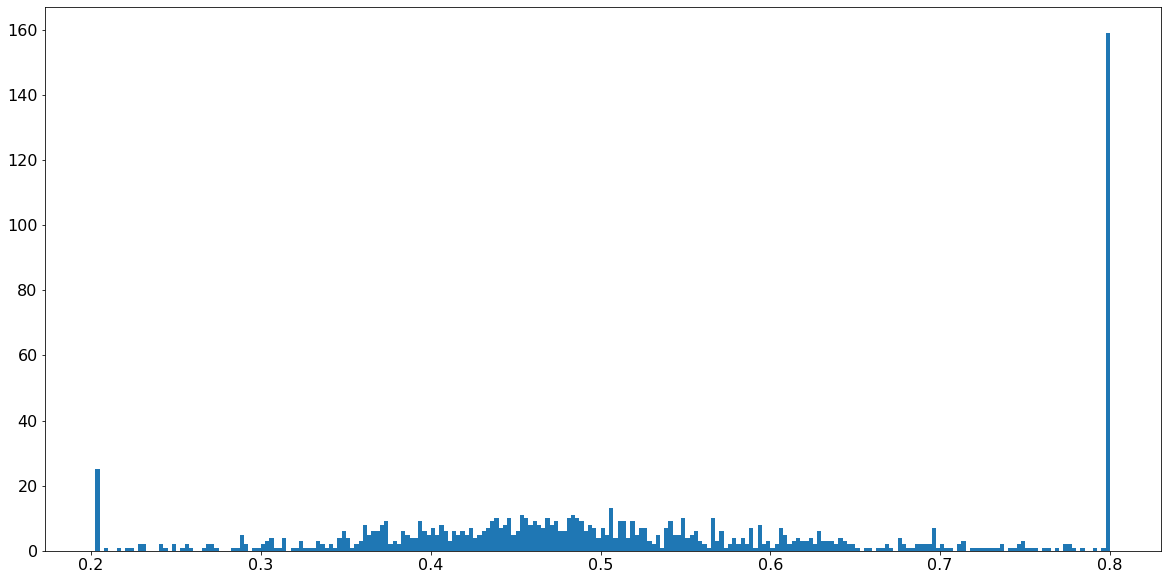

In [70]:
plt.figure(figsize=(20, 10))
counts2, bins2, _ = plt.hist(out2.values(), bins=239)

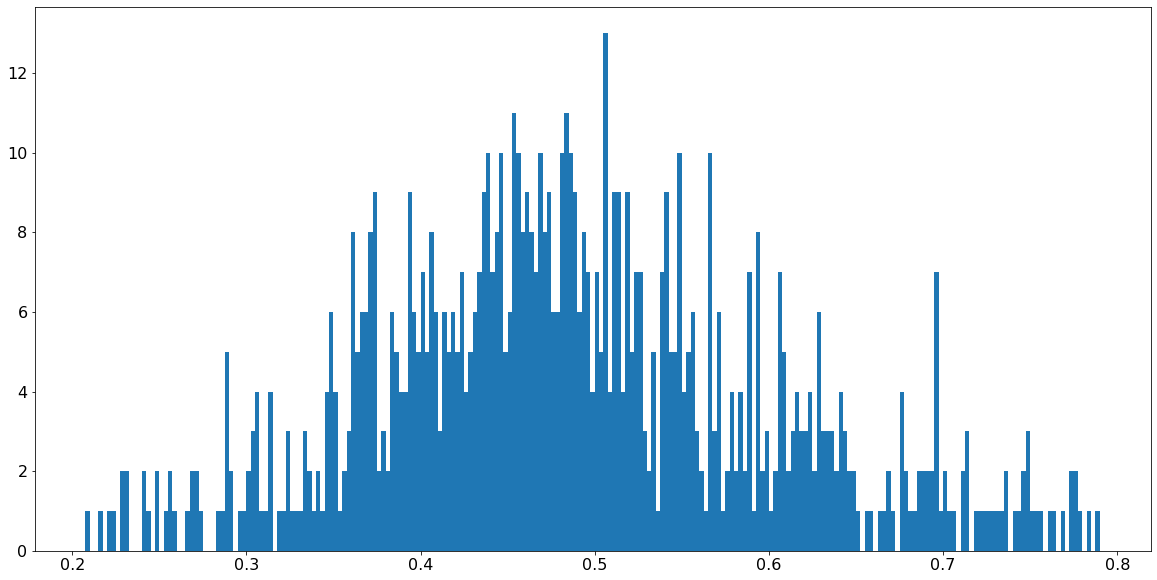

In [92]:
plt.figure(figsize=(20, 10))
counts2, bins2, _ = plt.hist([ x for x in out2.values() if x > 0.20251 and x < 0.795 ], bins=233)

(0.47363729994369547, 0.004247810478694238, -0.10400639162554141)

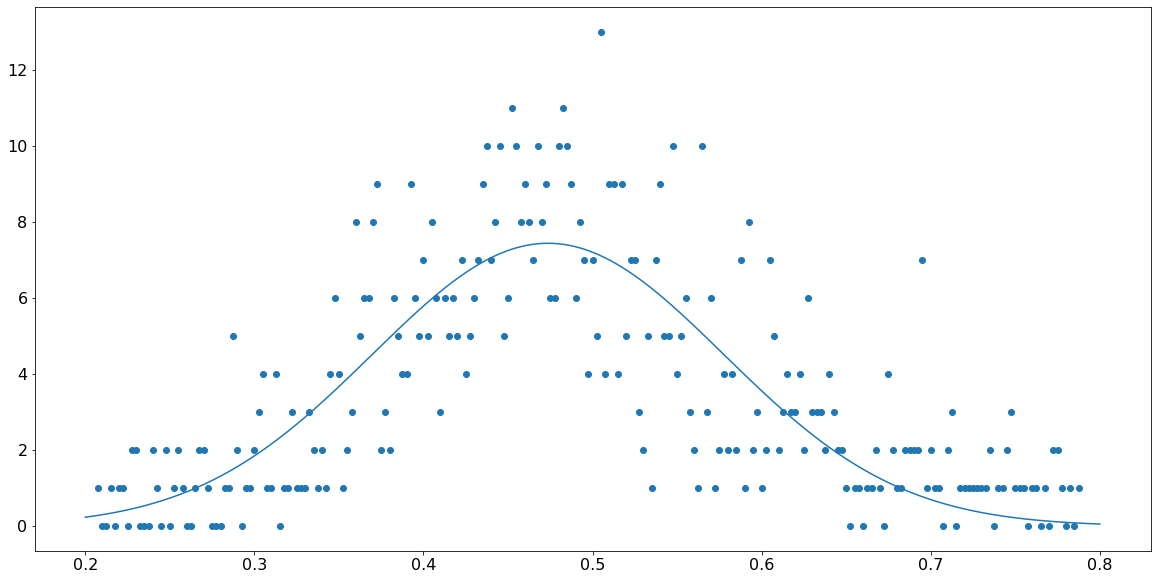

In [101]:
(A_fit, mu_fit, sigma_fit), var_matrix = curve_fit(gaussian, bins2[:-1], counts2, p0=[1, 0, 1])

xs = np.linspace(0.2, 0.8, 2000)
plt.figure(figsize=(20, 10))
plt.scatter(bins2[:-1], counts2)
plt.plot(xs, gaussian(xs, A_fit, mu_fit, sigma_fit))
mu_fit, var_matrix[1, 1]**.5, sigma_fit

In [96]:
out2

{3217536339907648384: 0.5875000000000004,
 3697743267334291328: 0.8000000000000005,
 3683666666640754048: 0.6800000000000004,
 3683528776714709632: 0.6150000000000004,
 3683494176458551808: 0.5450000000000004,
 3658537736409397888: 0.8000000000000005,
 3694803688638177280: 0.3275000000000001,
 3649721512875483904: 0.4050000000000002,
 3652755958809710464: 0.5400000000000003,
 3695425290664568704: 0.46750000000000025,
 3649003463063106304: 0.8000000000000005,
 3217961747828046080: 0.8000000000000005,
 3683515410776636800: 0.8000000000000005,
 3217574234403744000: 0.46250000000000024,
 3637758792005488896: 0.4225000000000002,
 3073311956582747392: 0.5775000000000003,
 3694818222807582080: 0.5500000000000003,
 3793876214650688640: 0.3025000000000001,
 3661566306828100224: 0.47000000000000025,
 3659347256140256256: 0.8000000000000005,
 3685958598628554240: 0.2025,
 3602512675468007808: 0.4000000000000002,
 3083085790322125056: 0.8000000000000005,
 3695495659409680896: 0.8000000000000005,
 

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


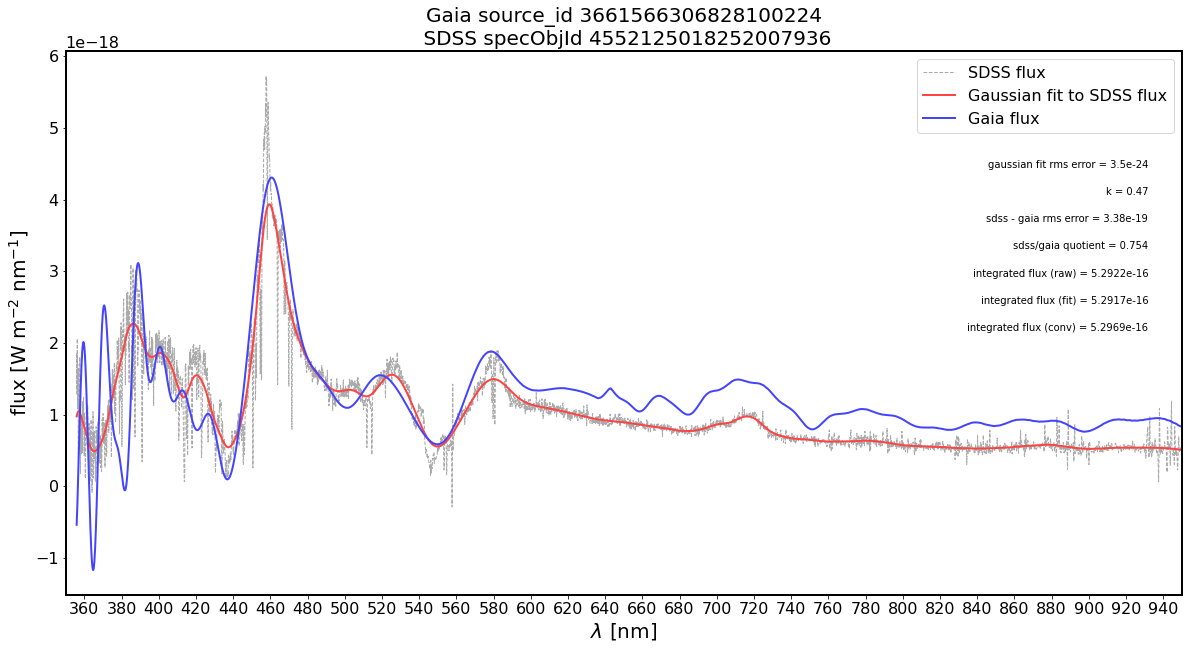

In [15]:
plot_conv(gaia_id=3661566306828100224, k=0.474)

In [19]:
sp = sdss.SpecObj(4270770431085271040)
sp.plate, sp.mjd, sp.fiberID

(3793, 55214, 844)

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


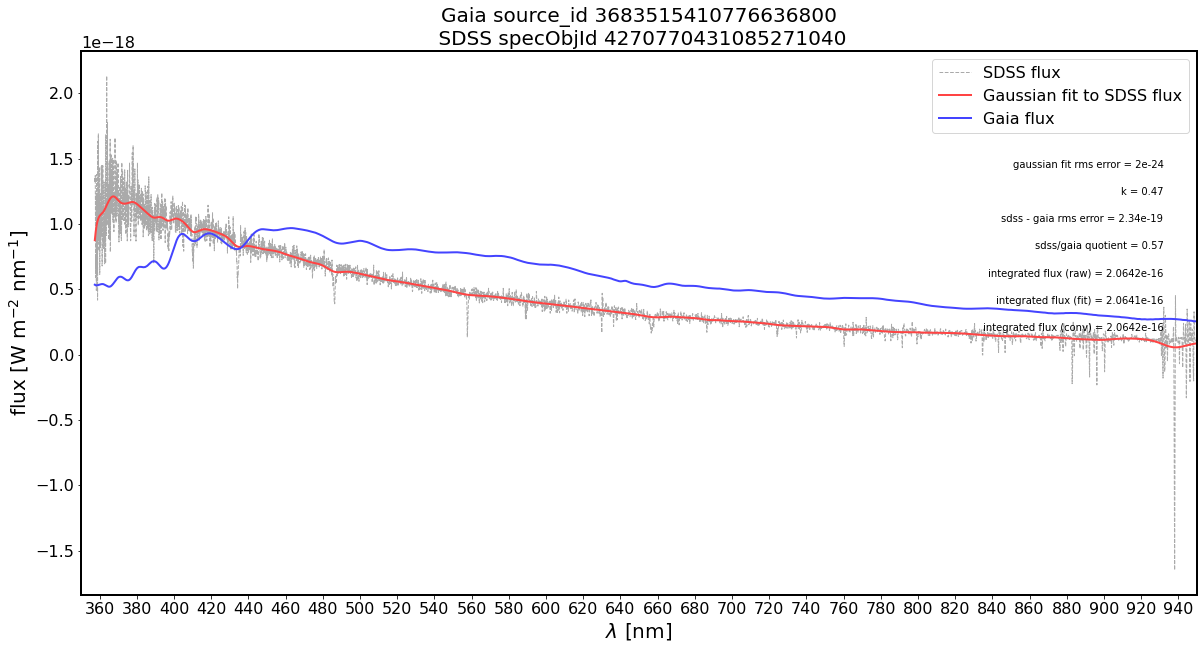

In [16]:
plot_conv(gaia_id=3683515410776636800, k=0.474)

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


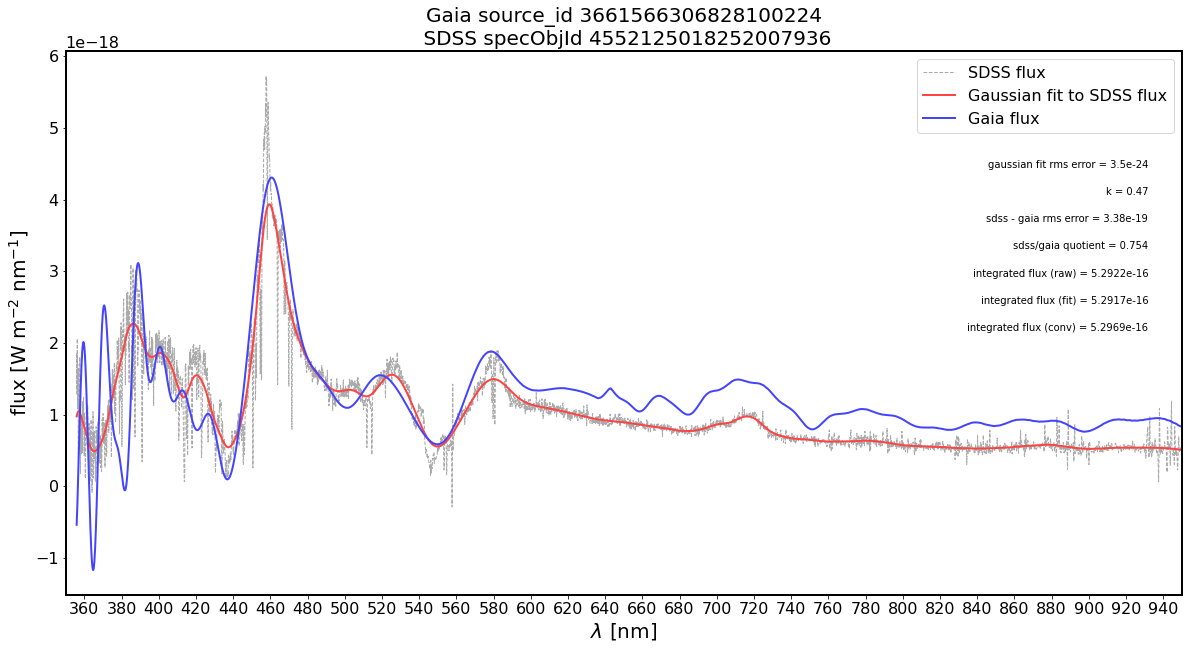

In [15]:
plot_conv(gaia_id=3661566306828100224, k=0.474)

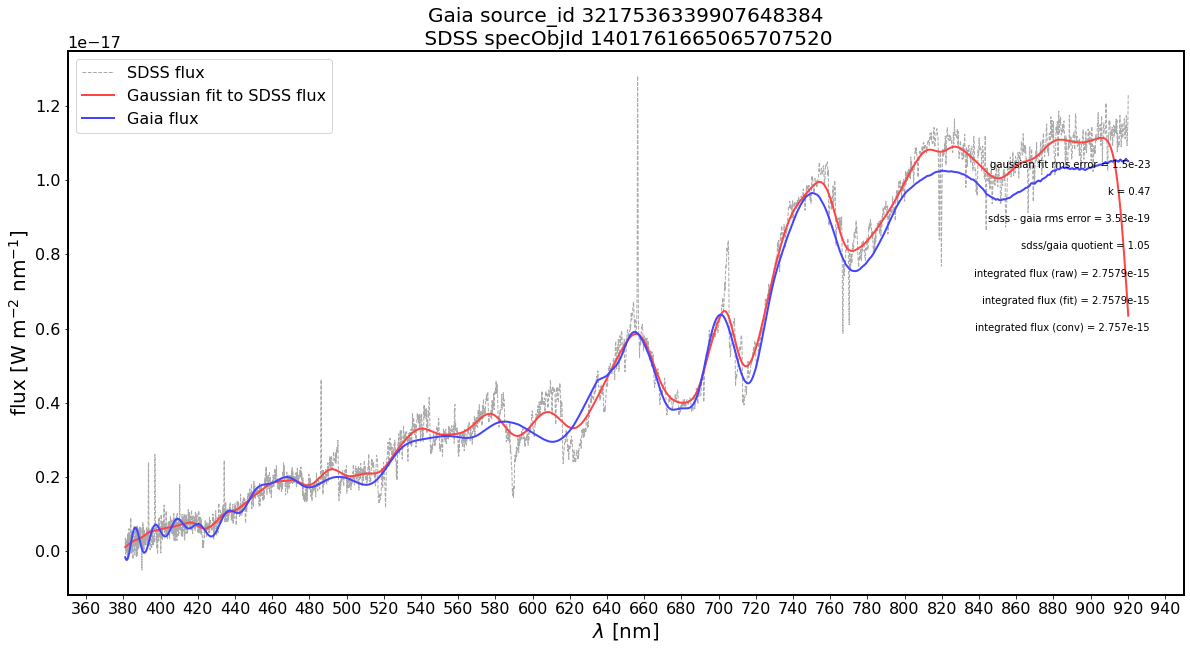

In [20]:
plot_conv(gaia_id=3217536339907648384, k=0.474)

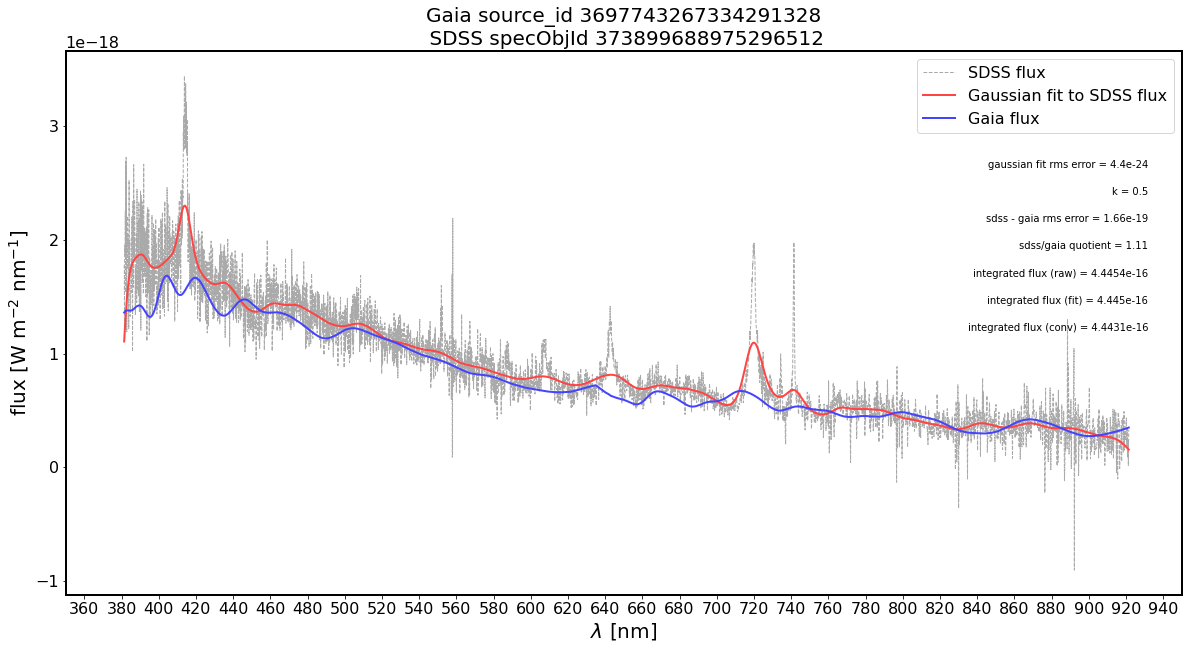

In [9]:
plot_conv(gaia_id=3697743267334291328, k=.5)

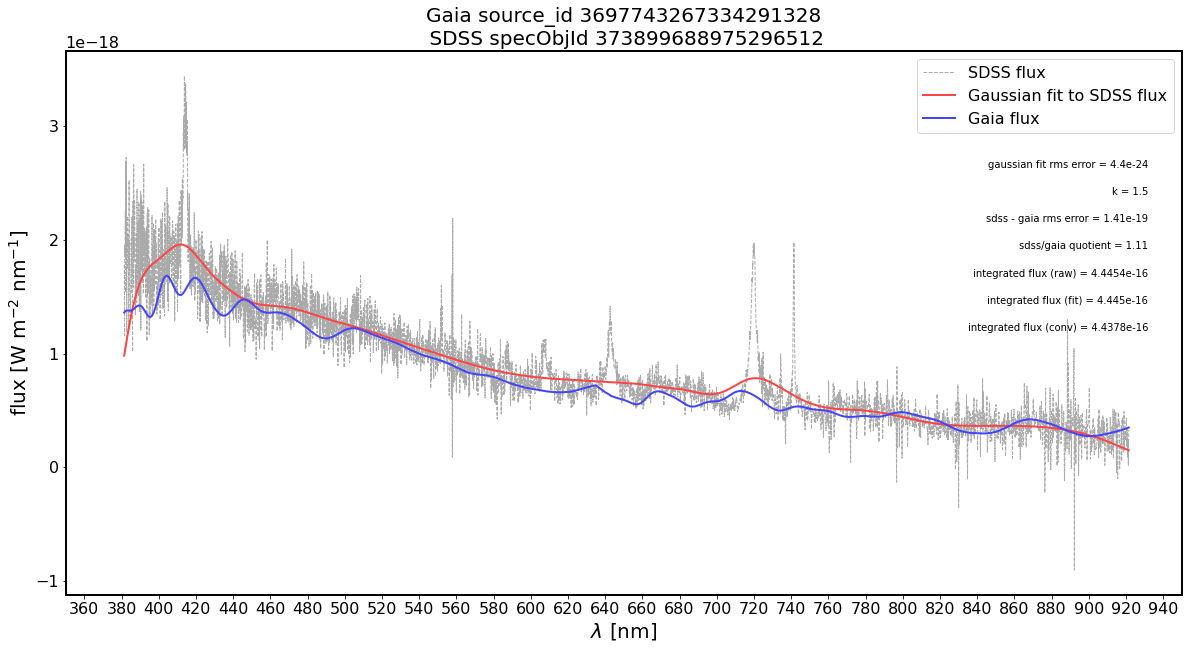

In [10]:
plot_conv(gaia_id=3697743267334291328, k=1.5)